# Importing libraries 

In [320]:
import pandas as pd
import numpy as np

# Getting data from Github

In [321]:
url="https://raw.githubusercontent.com/AJAYVISWA22/Uber-Fare-Prediction/main/Data/uber.csv"
df=pd.read_csv(url)
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


Unnamed 0 columns was to drop cause all the values are uniqeu, key values are same as pickup_datetime

# Exploring the data 

In [525]:
df1=df.copy()
df1.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [527]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [528]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [529]:
df1['Unnamed: 0'].nunique()

200000

In [530]:
df1['key'].nunique()

200000

In [531]:
df1["pickup_datetime"].nunique()

196629

In [532]:
df1['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

Passenger count should not be 0  and 208 values are wrong

## Extracting the features

In [533]:
df1['pickup_datetime'][0]

'2015-05-07 19:52:06 UTC'

In [534]:
# Extracting features from "Pickup_datetime"

df1['pickup_datetime']=pd.to_datetime(df1['pickup_datetime'])
df1['date']=df1['pickup_datetime'].dt.date
df1['year']=df1['pickup_datetime'].dt.year
df1['month']=df1['pickup_datetime'].dt.month
df1['day']=df1['pickup_datetime'].dt.day
df1['day_name']=df1['pickup_datetime'].dt.day_name()
df1['week_of_year'] = df1['pickup_datetime'].dt.isocalendar().week
df1['time']=df1['pickup_datetime'].dt.time
df1['hour']=df1['pickup_datetime'].dt.hour
df1['minutes']=df1['pickup_datetime'].dt.minute




In [535]:
# Define a function to segment time of day
def segment_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to create a new column for time of day
df1['time_of_day'] = df1['hour'].apply(segment_time_of_day)

In [536]:
def segment_passenger_count(count):
    if count <= 2:
        return 'mini'
    elif 3 <= count <= 4:
        return 'xuv'
    else:
        return 'premium xuv'

# Apply the function to create a new column for vehicle type
df1['vehicle_type'] = df1['passenger_count'].apply(segment_passenger_count)

In [537]:
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (mean radius)
    r = 6371.0
    return c * r

# Calculate the distance and add it as a new column
df1['distance_km'] = df1.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)






In [538]:
df1['distance_km']=df1['distance_km'].round(3)

In [539]:
df1

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,...,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,...,5,7,Thursday,19,19:52:06,19,52,evening,mini,1.683
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,...,7,17,Friday,29,20:04:56,20,4,evening,mini,2.458
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,...,8,24,Monday,35,21:45:00,21,45,night,mini,5.036
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,...,6,26,Friday,26,08:22:21,8,22,morning,xuv,1.662
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,...,8,28,Thursday,35,17:47:00,17,47,evening,premium xuv,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,...,10,28,Sunday,43,10:49:00,10,49,morning,mini,0.112
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,...,3,14,Friday,11,01:09:00,1,9,night,mini,1.875
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,...,6,29,Monday,27,00:42:00,0,42,night,mini,12.850
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,...,5,20,Wednesday,21,14:56:25,14,56,afternoon,mini,3.540


In [540]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
 9   date               200000 non-null  object             
 10  year               200000 non-null  int32              
 11  month              200000 non-null  int32              
 12  day                200000 non-

Dropping the Unwanted Columns

In [542]:
df1.drop(['Unnamed: 0','key','pickup_datetime','date','time'],axis=1,inplace=True)

In [543]:
df1

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,evening,mini,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,evening,mini,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,night,mini,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,Friday,26,8,22,morning,xuv,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,Thursday,35,17,47,evening,premium xuv,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,Sunday,43,10,49,morning,mini,0.112
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,Friday,11,1,9,night,mini,1.875
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,Monday,27,0,42,night,mini,12.850
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,Wednesday,21,14,56,afternoon,mini,3.540


# Wrong values

In [546]:
df2=df1.copy()
df2.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,evening,mini,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,evening,mini,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,night,mini,5.036


## Location

New yorks latitude and longitude ranges from:
- Latitude	40° 30′ N to 45° 1′ N
- Longitude	71° 51′ W to 79° 46′ W

values exceeds this are wrong values

In [547]:
df2["pickup_latitude"].min(),df2["pickup_latitude"].max()

(np.float64(-74.01551500000001), np.float64(1644.421482))

In [350]:
df2["pickup_longitude"].min(),df2["pickup_longitude"].max()

(np.float64(-1340.64841), np.float64(57.418457))

In [351]:
df2['dropoff_latitude'].min(),df2["dropoff_latitude"].max()

(np.float64(-881.9855130000001), np.float64(872.6976279999999))

In [352]:
df2["dropoff_longitude"].min(),df2["dropoff_longitude"].max()


(np.float64(-3356.6663), np.float64(1153.5726029999998))

In [548]:
wrong_lat = df2.loc[df2["pickup_latitude"].idxmax()]
wrong_lat

fare_amount                 15.7
pickup_longitude     -1340.64841
pickup_latitude      1644.421482
dropoff_longitude     -3356.6663
dropoff_latitude      872.697628
passenger_count                1
year                        2011
month                         11
day                            5
day_name                Saturday
week_of_year                  44
hour                           0
minutes                       22
time_of_day                night
vehicle_type                mini
distance_km            16409.239
Name: 75851, dtype: object

In row 75851 has wrong values 
- pickup_longitude                      -1340.64841
- pickup_latitude                       1644.421482
- dropoff_longitude                      -3356.6663
- dropoff_latitude                       872.697628

In [356]:
wrong_lon=df2.loc[df2['pickup_longitude'].idxmax()]
wrong_lon

fare_amount                 16.1
pickup_longitude       57.418457
pickup_latitude      1292.016128
dropoff_longitude    1153.572603
dropoff_latitude     -881.985513
passenger_count                1
year                        2011
month                          5
day                           18
day_name               Wednesday
week_of_year                  20
hour                          13
minutes                       24
time_of_day            afternoon
vehicle_type                mini
distance_km             2246.893
Name: 91422, dtype: object

In [222]:
columns_of_interest = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

# Combine the columns into a single DataFrame to find unique rows
unique_values_df = df2[columns_of_interest].drop_duplicates()

# Count unique values for each column
unique_counts = unique_values_df.nunique()

print("Unique values count for each column:")
print(unique_counts)

print("\nUnique rows:")
print(unique_values_df)

Unique values count for each column:
pickup_latitude      83835
pickup_longitude     71066
dropoff_latitude     90585
dropoff_longitude    76894
dtype: int64

Unique rows:
        pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude
0             40.738354        -73.999817         40.723217         -73.999512
1             40.728225        -73.994355         40.750325         -73.994710
2             40.740770        -74.005043         40.772647         -73.962565
3             40.790844        -73.976124         40.803349         -73.965316
4             40.744085        -73.925023         40.761247         -73.973082
...                 ...               ...               ...                ...
199995        40.739367        -73.987042         40.740297         -73.986525
199996        40.736837        -73.984722         40.739620         -74.006672
199997        40.756487        -73.986017         40.692588         -73.858957
199998        40.725452        -73.997

In [357]:
valid_latitude_range = (40.5, 45.0)  # From 40° 30′ N to 45° 1′ N
valid_longitude_range = (-79.8, -71.85)  # From 79° 46′ W to 71° 51′ W


invalid_rows_loc = df[
    (df['pickup_latitude'] < valid_latitude_range[0]) | (df['pickup_latitude'] > valid_latitude_range[1]) |
    (df['pickup_longitude'] < valid_longitude_range[0]) | (df['pickup_longitude'] > valid_longitude_range[1]) |
    (df['dropoff_latitude'] < valid_latitude_range[0]) | (df['dropoff_latitude'] > valid_latitude_range[1]) |
    (df['dropoff_longitude'] < valid_longitude_range[0]) | (df['dropoff_longitude'] > valid_longitude_range[1])
]

# Print the rows with invalid latitude and longitude values

invalid_rows_loc

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.0,0.000000,0.000000,0.000000,1
11,6379048,2011-05-23 22:15:00.00000086,8.5,2011-05-23 22:15:00 UTC,0.0,0.000000,0.000000,0.000000,1
65,21993993,2014-05-05 19:27:00.00000034,6.0,2014-05-05 19:27:00 UTC,0.0,0.000000,0.000000,0.000000,1
92,1454546,2011-12-02 14:07:00.000000207,6.1,2011-12-02 14:07:00 UTC,0.0,0.000000,0.000000,0.000000,1
120,17358122,2010-08-20 19:39:48.0000003,6.5,2010-08-20 19:39:48 UTC,0.0,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
199724,46007628,2013-10-11 11:25:41.0000004,7.5,2013-10-11 11:25:41 UTC,0.0,0.000000,0.000000,0.000000,1
199880,35013970,2014-02-22 06:45:46.0000002,6.5,2014-02-22 06:45:46 UTC,0.0,0.000000,0.000000,0.000000,1
199883,44115598,2012-09-10 17:39:00.00000090,12.5,2012-09-10 17:39:00 UTC,0.0,0.000000,0.000000,0.000000,2
199936,44787414,2012-07-21 16:19:00.00000099,4.1,2012-07-21 16:19:00 UTC,-736.4,40.774307,-73.982215,40.769672,5


## Fare Amount

fare_amount should not be less than 0

In [358]:
aa=df2[(df2['fare_amount'] <= 0)]
aa 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
20744,0.00,-73.658897,40.805199,-73.658897,40.805199,1,2015,4,22,Wednesday,17,23,25,night,mini,0.000
22182,0.00,-73.994366,40.755395,-73.998718,40.854853,2,2010,3,20,Saturday,11,2,59,night,mini,11.065
63395,-5.00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,3,Tuesday,10,23,7,night,mini,0.325
71246,-3.30,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,11,Thursday,6,21,47,night,mini,0.501
79903,-3.50,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,1,Friday,18,14,43,afternoon,mini,0.384
87467,0.00,-73.969475,40.807503,0.000000,0.000000,2,2015,1,4,Sunday,1,3,51,night,mini,8665.984
89322,-49.57,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,9,Tuesday,10,8,26,morning,premium xuv,0.019
92063,-23.70,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,12,Friday,10,8,49,morning,xuv,8.171
98875,-52.00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,20,Friday,12,21,31,night,premium xuv,0.450
104080,-7.30,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,9,Tuesday,10,20,25,evening,mini,1.997


## Passenger Count

Passenger Count should not be 0

In [363]:
aa=df1[(df1['passenger_count'] <= 0) ]
aa

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
333,10.1,-74.013900,40.707800,-73.992300,40.749300,0,2011,8,5,Friday,31,7,3,morning,mini,4.961
908,11.7,-73.981000,40.764600,-73.962900,40.778400,0,2011,9,6,Tuesday,36,12,25,afternoon,mini,2.163
926,3.3,-73.979978,40.765821,-73.983894,40.766873,0,2012,3,26,Monday,13,18,11,evening,mini,0.350
2000,15.7,-73.975285,40.750138,-73.974729,40.783151,0,2012,4,20,Friday,16,15,7,afternoon,mini,3.671
3011,6.1,-73.977900,40.789100,-73.983700,40.773600,0,2012,1,7,Saturday,1,19,19,evening,mini,1.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196797,3.3,-74.000760,40.757637,-74.004852,40.751947,0,2011,1,17,Monday,3,15,52,afternoon,mini,0.720
197103,7.3,0.000000,0.000000,0.000000,0.000000,0,2011,12,10,Saturday,49,15,33,afternoon,mini,0.000
198872,5.7,-73.980300,40.742800,-73.967900,40.755600,0,2011,9,20,Tuesday,38,19,55,evening,mini,1.765
198902,12.1,-73.996700,40.737200,-74.008500,40.704000,0,2011,8,22,Monday,34,21,10,night,mini,3.823


In [361]:
aa=df1[(df1['passenger_count'] >=7 ) ]
aa

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
113038,11.7,-73.937795,40.758498,-73.937835,40.758415,208,2010,12,28,Tuesday,52,8,20,morning,premium xuv,0.01


In [364]:
pc_fa=df1[(df2['passenger_count'] <= 0) | (df2['fare_amount']<=0) | (df2['passenger_count'] >=7)  ]
pc_fa

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
333,10.1,-74.013900,40.707800,-73.992300,40.749300,0,2011,8,5,Friday,31,7,3,morning,mini,4.961
908,11.7,-73.981000,40.764600,-73.962900,40.778400,0,2011,9,6,Tuesday,36,12,25,afternoon,mini,2.163
926,3.3,-73.979978,40.765821,-73.983894,40.766873,0,2012,3,26,Monday,13,18,11,evening,mini,0.350
2000,15.7,-73.975285,40.750138,-73.974729,40.783151,0,2012,4,20,Friday,16,15,7,afternoon,mini,3.671
3011,6.1,-73.977900,40.789100,-73.983700,40.773600,0,2012,1,7,Saturday,1,19,19,evening,mini,1.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197103,7.3,0.000000,0.000000,0.000000,0.000000,0,2011,12,10,Saturday,49,15,33,afternoon,mini,0.000
197172,0.0,0.000000,0.000000,0.000000,0.000000,5,2015,2,13,Friday,7,7,35,morning,premium xuv,0.000
198872,5.7,-73.980300,40.742800,-73.967900,40.755600,0,2011,9,20,Tuesday,38,19,55,evening,mini,1.765
198902,12.1,-73.996700,40.737200,-74.008500,40.704000,0,2011,8,22,Monday,34,21,10,night,mini,3.823


we  can make the wrong values as null or else 
we can use some models to predict the correct values based on the  remaining datas

In [369]:
valid_latitude_range = (40.5, 45.0)  # From 40° 30′ N to 45° 1′ N
valid_longitude_range = (-79.8, -71.85)  # From 79° 46′ W to 71° 51′ W


invalid_rows = df2[
    (df2['pickup_latitude'] < valid_latitude_range[0]) | (df2['pickup_latitude'] > valid_latitude_range[1]) |
    (df2['pickup_longitude'] < valid_longitude_range[0]) | (df2['pickup_longitude'] > valid_longitude_range[1]) |
    (df2['dropoff_latitude'] < valid_latitude_range[0]) | (df2['dropoff_latitude'] > valid_latitude_range[1]) |
    (df2['dropoff_longitude'] < valid_longitude_range[0]) | (df2['dropoff_longitude'] > valid_longitude_range[1])|
    (df2['passenger_count'] <= 0) | (df2['fare_amount']<=0) | (df2['passenger_count'] >=7)
]


invalid_rows

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
7,2.5,0.0,0.000000,0.000000,0.000000,1,2012,12,11,Tuesday,50,13,52,afternoon,mini,0.000
11,8.5,0.0,0.000000,0.000000,0.000000,1,2011,5,23,Monday,21,22,15,night,mini,0.000
65,6.0,0.0,0.000000,0.000000,0.000000,1,2014,5,5,Monday,19,19,27,evening,mini,0.000
92,6.1,0.0,0.000000,0.000000,0.000000,1,2011,12,2,Friday,48,14,7,afternoon,mini,0.000
120,6.5,0.0,0.000000,0.000000,0.000000,1,2010,8,20,Friday,33,19,39,evening,mini,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199724,7.5,0.0,0.000000,0.000000,0.000000,1,2013,10,11,Friday,41,11,25,morning,mini,0.000
199880,6.5,0.0,0.000000,0.000000,0.000000,1,2014,2,22,Saturday,8,6,45,morning,mini,0.000
199883,12.5,0.0,0.000000,0.000000,0.000000,2,2012,9,10,Monday,37,17,39,evening,mini,0.000
199936,4.1,-736.4,40.774307,-73.982215,40.769672,5,2012,7,21,Saturday,29,16,19,afternoon,premium xuv,4757.216


In [229]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,month,day,day_name,week_of_year,time,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,2015,5,7,3,19,19:52:06,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,2009,7,17,4,29,20:04:56,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,2009,8,24,0,35,21:45:00,21,45,3,0,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,2009,6,26,4,26,08:22:21,8,22,0,1,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,2014,8,28,3,35,17:47:00,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,2012,10,28,6,43,10:49:00,10,49,0,0,0.112
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,2014,3,14,4,11,01:09:00,1,9,3,0,1.875
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,2009,6,29,0,27,00:42:00,0,42,3,0,12.850
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,2015,5,20,2,21,14:56:25,14,56,1,0,3.540


In [550]:
# Remove the wrong  rows from df1
valid_data = pd.concat([df2, invalid_rows]).drop_duplicates(keep=False).reset_index(drop=True)

valid_data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,evening,mini,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,evening,mini,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,night,mini,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,Friday,26,8,22,morning,xuv,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,Thursday,35,17,47,evening,premium xuv,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195080,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,Sunday,43,10,49,morning,mini,0.112
195081,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,Friday,11,1,9,night,mini,1.875
195082,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,Monday,27,0,42,night,mini,12.850
195083,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,Wednesday,21,14,56,afternoon,mini,3.540


In [551]:
# checking the dataframe 

valid_data[(valid_data['passenger_count'] <= 0) | (valid_data['fare_amount']<=0) ]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km


In [555]:
valid_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,evening,mini,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,evening,mini,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,night,mini,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,Friday,26,8,22,morning,xuv,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,Thursday,35,17,47,evening,premium xuv,4.475


In [557]:

# Sorting the dataframe by 'distance_km' column in descending order
sorted_valid_data = valid_data.sort_values(by='distance_km', ascending=False)

# Display the row(s) with the maximum distance_km
print(sorted_valid_data.head())  # Displaying the top row

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
115382          9.7        -77.316665        40.800965         -73.924625   
165589         35.3        -75.419276        40.771689         -73.980900   
110209         32.1        -73.986632        40.761410         -75.423067   
31966          60.3        -73.137393        41.366138         -74.177279   
124999         45.0        -75.341033        40.642462         -73.991631   

        dropoff_latitude  passenger_count  year  month  day  day_name  \
115382         40.822872                3  2012      2   28   Tuesday   
165589         40.764442                2  2011      4    4    Monday   
110209         40.773931                2  2011      5    5  Thursday   
31966          40.691147                2  2010      6   19  Saturday   
124999         40.770451                1  2011      3    6    Sunday   

        week_of_year  hour  minutes time_of_day vehicle_type  distance_km  
115382             9  

In [560]:
valid_data['distance_km'].max()

np.float64(121.134)

In [559]:
valid_data.loc[valid_data['distance_km'].idxmax()]

fare_amount               35.3
pickup_longitude    -75.419276
pickup_latitude      40.771689
dropoff_longitude     -73.9809
dropoff_latitude     40.764442
passenger_count              2
year                      2011
month                        4
day                          4
day_name                Monday
week_of_year                14
hour                        23
minutes                     59
time_of_day              night
vehicle_type              mini
distance_km            121.134
Name: 165589, dtype: object

In [558]:

# Drop the row with the maximum distance_km
valid_data = valid_data.drop(valid_data['distance_km'].idxmax())

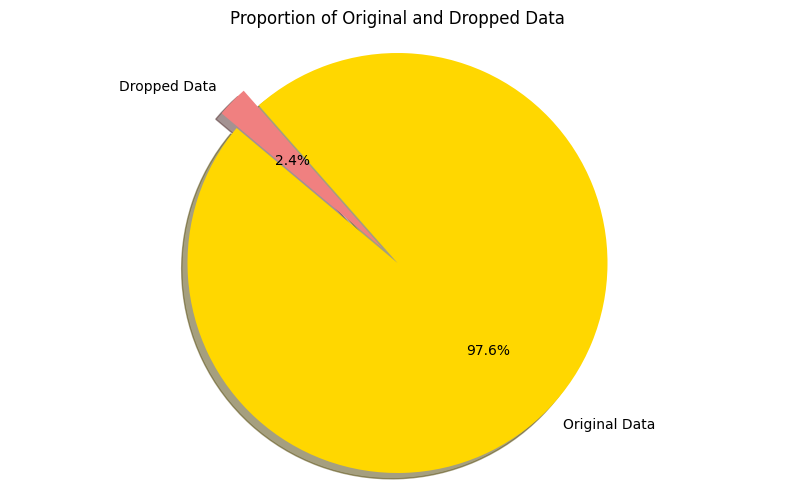

In [561]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate number of rows
original_count = len(df)
cleaned_count = len(valid_data)
dropped_count = original_count - cleaned_count

# Data to plot
labels = 'Original Data', 'Dropped Data'
sizes = [original_count, dropped_count]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Original and Dropped Data')
plt.show()


# Encoding

In [426]:
df_en=valid_data.copy()
df_en.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,evening,mini,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,evening,mini,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,night,mini,5.036


In [425]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195085 entries, 0 to 195084
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        195085 non-null  float64
 1   pickup_longitude   195085 non-null  float64
 2   pickup_latitude    195085 non-null  float64
 3   dropoff_longitude  195085 non-null  float64
 4   dropoff_latitude   195085 non-null  float64
 5   passenger_count    195085 non-null  int64  
 6   year               195085 non-null  int32  
 7   month              195085 non-null  int32  
 8   day                195085 non-null  int32  
 9   day_name           195085 non-null  int64  
 10  week_of_year       195085 non-null  UInt32 
 11  hour               195085 non-null  int32  
 12  minutes            195085 non-null  int32  
 13  time_of_day        195085 non-null  int64  
 14  vehicle_type       195085 non-null  int64  
 15  distance_km        195085 non-null  float64
dtypes:


[day_name time_of_day vehicle_type] are categorical values changing it to numerical values

In [427]:

sorted(df_en['day_name'].unique())


['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [420]:
df_en["time_of_day"].unique()


array(['evening', 'night', 'morning', 'afternoon'], dtype=object)

In [422]:
df_en["vehicle_type"].unique()


array(['mini', 'xuv', 'premium xuv'], dtype=object)

In [428]:
df_en['day_name']=df_en['day_name'].map({
                                    'Monday': 0,
                                    'Tuesday': 1,
                                    'Wednesday': 2,
                                    'Thursday': 3,
                                    'Friday': 4,
                                    'Saturday': 5,
                                    'Sunday': 6
                                })
df_en['time_of_day']=df_en['time_of_day'].map({
                                    'morning': 0,
                                    'afternoon': 1,
                                    'evening': 2,
                                    'night': 3
                                })
df_en['vehicle_type']=df_en['vehicle_type'].map( {
                                    'mini': 0,
                                    'xuv': 1,
                                    'premium xuv': 2
                                })


In [429]:

for i in df_en.columns:
    print(i,len(df_en[i].unique()))


fare_amount 1208
pickup_longitude 70781
pickup_latitude 83520
dropoff_longitude 76568
dropoff_latitude 90226
passenger_count 6
year 7
month 12
day 31
day_name 7
week_of_year 53
hour 24
minutes 60
time_of_day 4
vehicle_type 3
distance_km 16330


In [445]:
df_en.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195085 entries, 0 to 195084
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        195085 non-null  float64
 1   pickup_longitude   195085 non-null  float64
 2   pickup_latitude    195085 non-null  float64
 3   dropoff_longitude  195085 non-null  float64
 4   dropoff_latitude   195085 non-null  float64
 5   passenger_count    195085 non-null  int64  
 6   year               195085 non-null  int32  
 7   month              195085 non-null  int32  
 8   day                195085 non-null  int32  
 9   day_name           195085 non-null  int64  
 10  week_of_year       195085 non-null  UInt32 
 11  hour               195085 non-null  int32  
 12  minutes            195085 non-null  int32  
 13  time_of_day        195085 non-null  int64  
 14  vehicle_type       195085 non-null  int64  
 15  distance_km        195085 non-null  float64
dtypes:

In [431]:
df_en.describe().T


,count,mean,std,min,25%,50%,75%,max
fare_amount,195085.0,11.350726,9.8014,0.01,6.0,8.5,12.5,499.0
pickup_longitude,195085.0,-73.975159,0.040616,-77.316665,-73.992272,-73.98211,-73.968363,-72.750302
pickup_latitude,195085.0,40.751039,0.029888,40.508697,40.736461,40.753307,40.767554,42.223633
dropoff_longitude,195085.0,-73.974199,0.03962,-75.423067,-73.991597,-73.980542,-73.965383,-72.75909
dropoff_latitude,195085.0,40.751339,0.033315,40.504147,40.735339,40.753752,40.768332,42.273158
passenger_count,195085.0,1.689735,1.305564,1.0,1.0,1.0,2.0,6.0
year,195085.0,2011.740534,1.862217,2009.0,2010.0,2012.0,2013.0,2015.0
month,195085.0,6.285055,3.440133,1.0,3.0,6.0,9.0,12.0
day,195085.0,15.702422,8.688371,1.0,8.0,16.0,23.0,31.0
day_name,195085.0,3.049189,1.947018,0.0,1.0,3.0,5.0,6.0


In [432]:
df_en.head(3)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,35,21,45,3,0,5.036


# Treating null Values

In [446]:
df_null=df_en.copy()
df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195085 entries, 0 to 195084
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        195085 non-null  float64
 1   pickup_longitude   195085 non-null  float64
 2   pickup_latitude    195085 non-null  float64
 3   dropoff_longitude  195085 non-null  float64
 4   dropoff_latitude   195085 non-null  float64
 5   passenger_count    195085 non-null  int64  
 6   year               195085 non-null  int32  
 7   month              195085 non-null  int32  
 8   day                195085 non-null  int32  
 9   day_name           195085 non-null  int64  
 10  week_of_year       195085 non-null  UInt32 
 11  hour               195085 non-null  int32  
 12  minutes            195085 non-null  int32  
 13  time_of_day        195085 non-null  int64  
 14  vehicle_type       195085 non-null  int64  
 15  distance_km        195085 non-null  float64
dtypes:

In [447]:
df_null.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_name             0
week_of_year         0
hour                 0
minutes              0
time_of_day          0
vehicle_type         0
distance_km          0
dtype: int64

In [449]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df_null.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df_null))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,fare_amount,0.0
1,pickup_longitude,0.0
2,pickup_latitude,0.0
3,dropoff_longitude,0.0
4,dropoff_latitude,0.0
5,passenger_count,0.0
6,year,0.0
7,month,0.0
8,day,0.0
9,day_name,0.0


Does not contain any missing values


In [567]:
df_null = df_null.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])


In [568]:
df_null.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,195085.0,11.350726,9.8014,0.01,6.0,8.5,12.5,499.0
passenger_count,195085.0,1.689735,1.305564,1.0,1.0,1.0,2.0,6.0
year,195085.0,2011.740534,1.862217,2009.0,2010.0,2012.0,2013.0,2015.0
month,195085.0,6.285055,3.440133,1.0,3.0,6.0,9.0,12.0
day,195085.0,15.702422,8.688371,1.0,8.0,16.0,23.0,31.0
day_name,195085.0,3.049189,1.947018,0.0,1.0,3.0,5.0,6.0
week_of_year,195085.0,25.530364,14.962381,1.0,13.0,24.0,39.0,53.0
hour,195085.0,13.49136,6.515414,0.0,9.0,14.0,19.0,23.0
minutes,195085.0,29.53286,17.336963,0.0,14.0,30.0,45.0,59.0
time_of_day,195085.0,1.540841,1.144816,0.0,0.0,2.0,3.0,3.0


# Outliers Handling - Interquartile Range (IQR) method

In [634]:
df_out=df_null.copy()
df_out

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,1,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,1,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,1,2009,8,24,0,35,21,45,3,0,5.036
3,5.3,3,2009,6,26,4,26,8,22,0,1,1.662
4,16.0,5,2014,8,28,3,35,17,47,2,2,4.475
...,...,...,...,...,...,...,...,...,...,...,...,...
195080,3.0,1,2012,10,28,6,43,10,49,0,0,0.112
195081,7.5,1,2014,3,14,4,11,1,9,3,0,1.875
195082,30.9,2,2009,6,29,0,27,0,42,3,0,12.850
195083,14.5,1,2015,5,20,2,21,14,56,1,0,3.540


In [635]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195085 entries, 0 to 195084
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      195085 non-null  float64
 1   passenger_count  195085 non-null  int64  
 2   year             195085 non-null  int32  
 3   month            195085 non-null  int32  
 4   day              195085 non-null  int32  
 5   day_name         195085 non-null  int64  
 6   week_of_year     195085 non-null  UInt32 
 7   hour             195085 non-null  int32  
 8   minutes          195085 non-null  int32  
 9   time_of_day      195085 non-null  int64  
 10  vehicle_type     195085 non-null  int64  
 11  distance_km      195085 non-null  float64
dtypes: UInt32(1), float64(2), int32(5), int64(4)
memory usage: 13.6 MB


In [636]:
df_out.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km'],
      dtype='object')

In [637]:
def plot_out(df,column):

    sampled_df = df.sample(n=min(1000, len(df)))
    plt.figure(figsize=(40,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=sampled_df,x=column)
    plt.title(f"Outlier of {column}")


    plt.show()

## Before Outlier

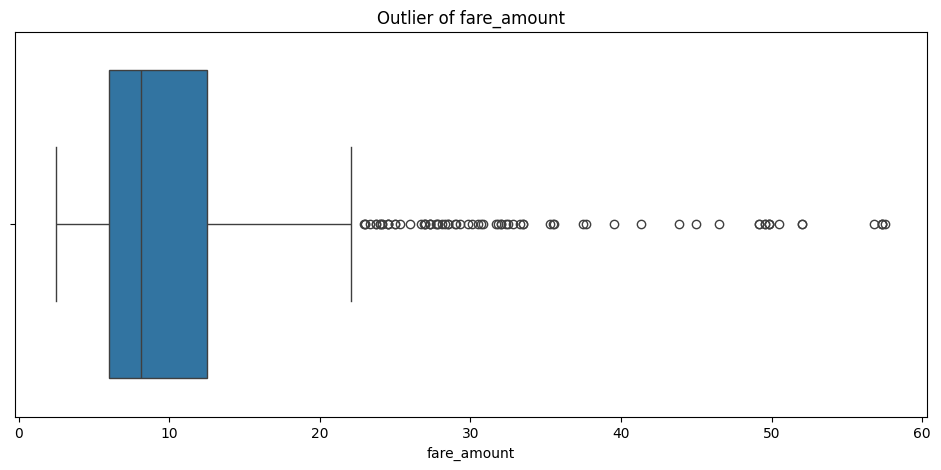

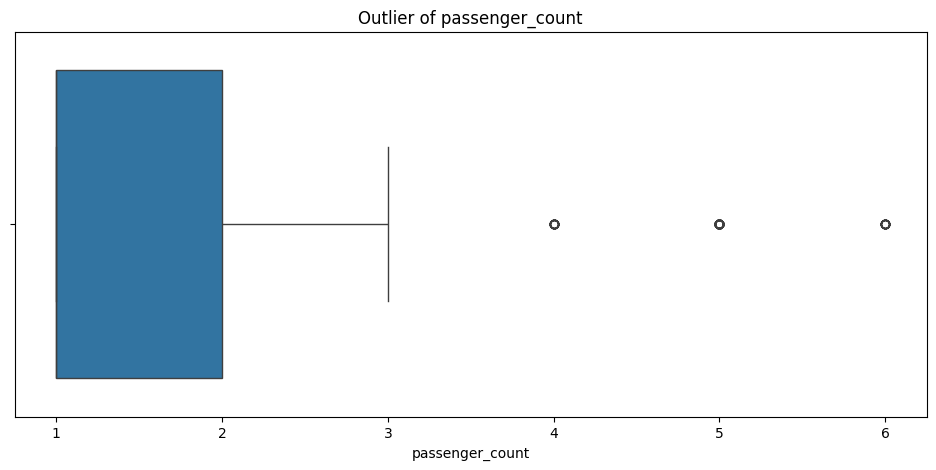

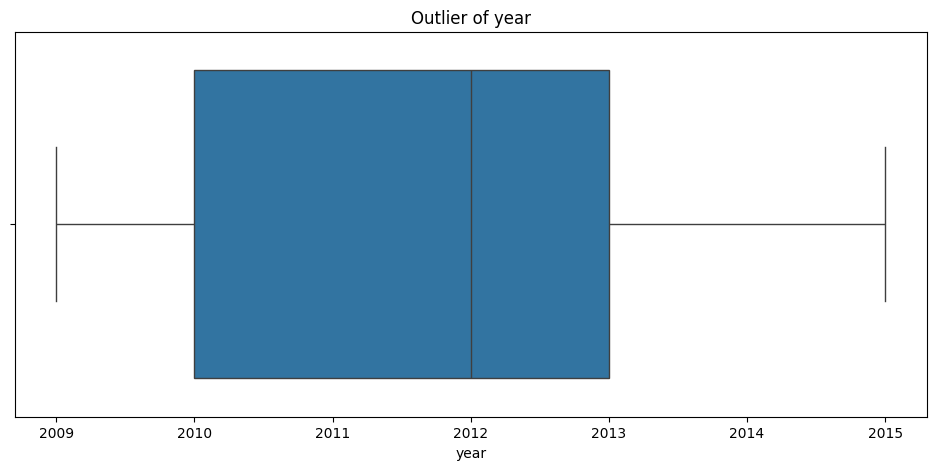

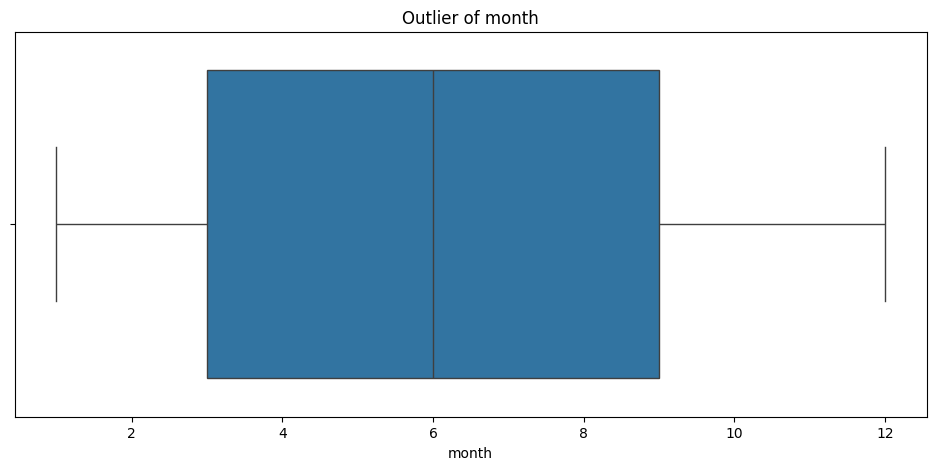

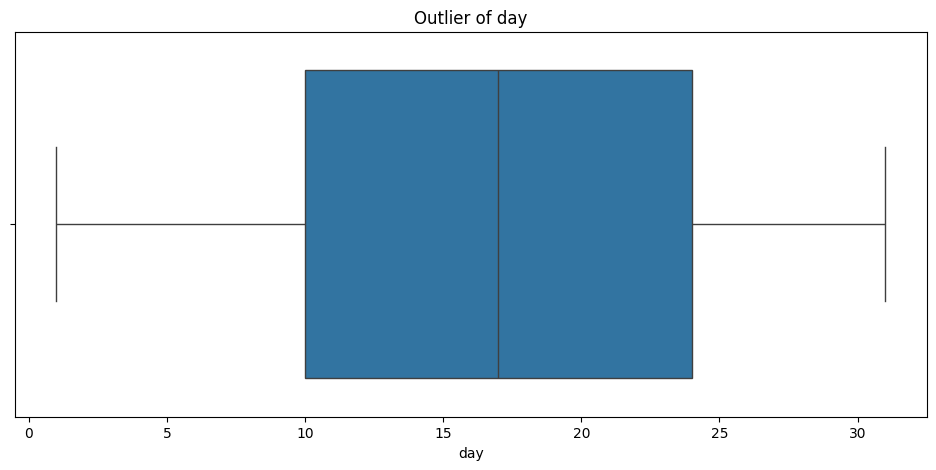

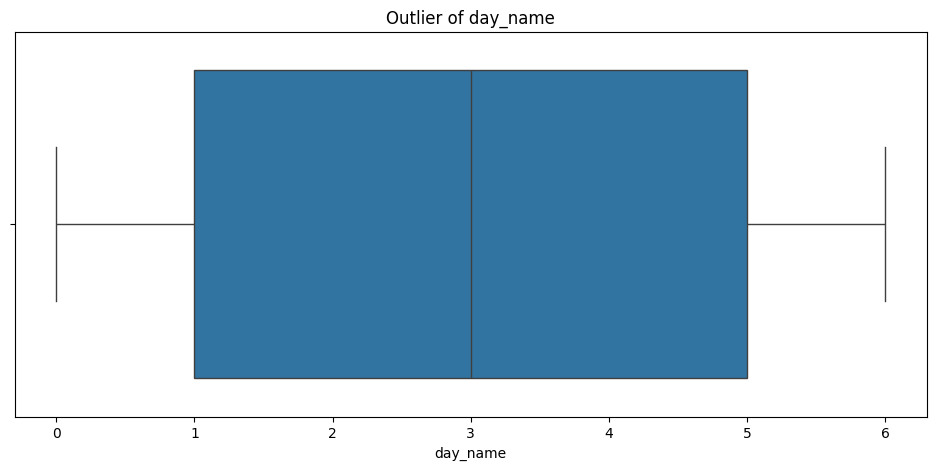

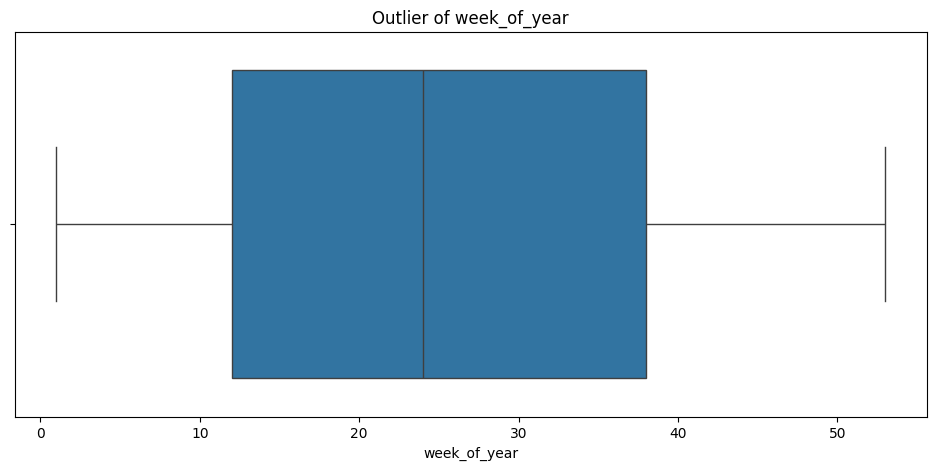

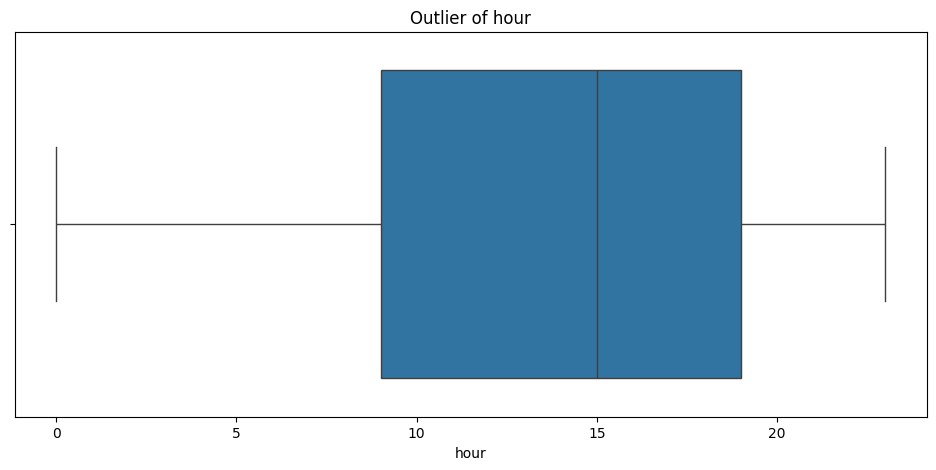

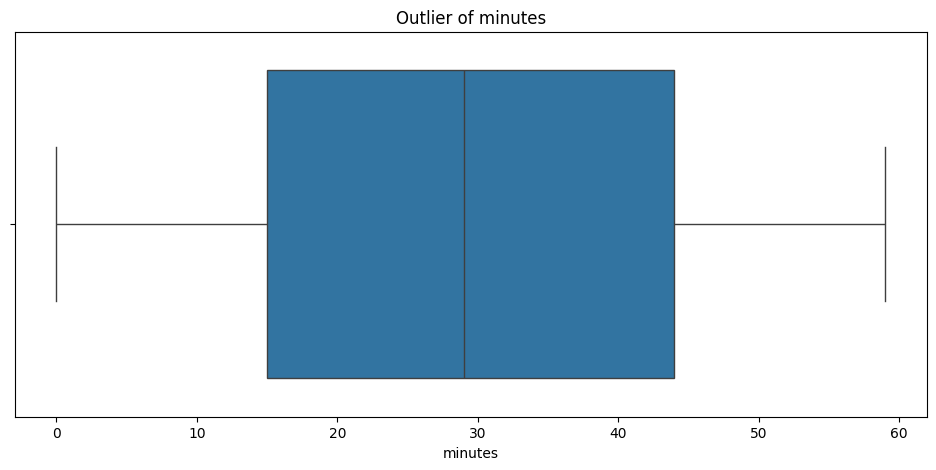

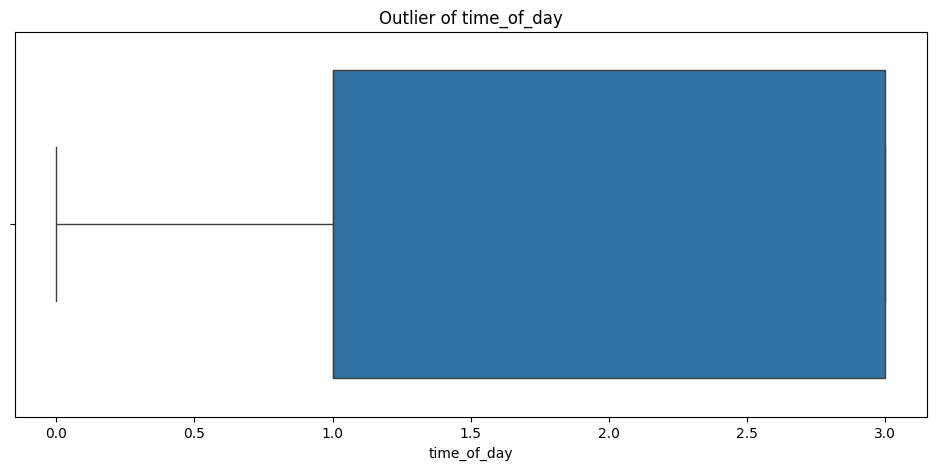

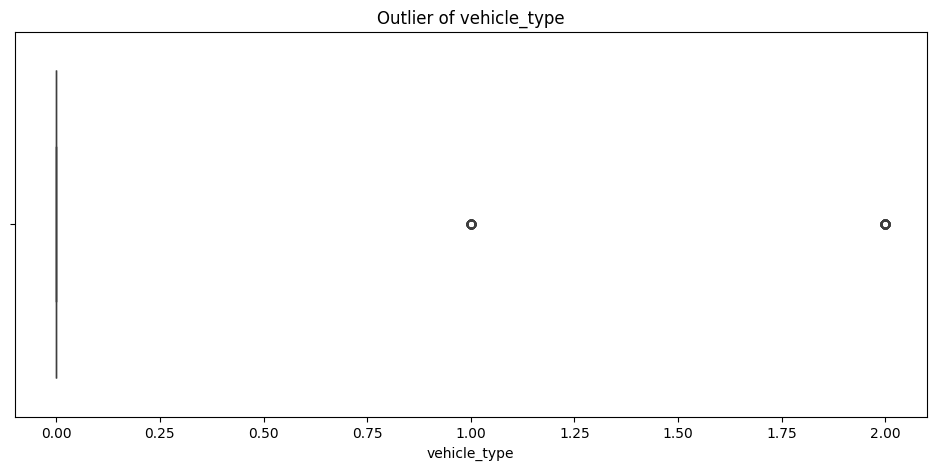

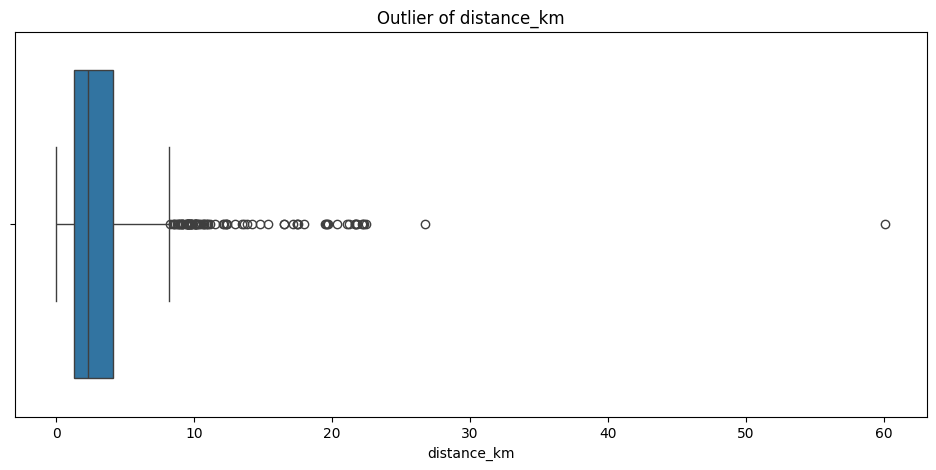

In [638]:
for i in ['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km']:
    plot_out(df_out,i)

In [639]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [640]:
outlier(df_out, 'fare_amount')
outlier(df_out, 'passenger_count')
outlier(df_out, 'distance_km')

df_out

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.50,1.0,2015,5,7,3,19,19,52,2,0,1.6830
1,7.70,1.0,2009,7,17,4,29,20,4,2,0,2.4580
2,12.90,1.0,2009,8,24,0,35,21,45,3,0,5.0360
3,5.30,3.0,2009,6,26,4,26,8,22,0,1,1.6620
4,16.00,3.5,2014,8,28,3,35,17,47,2,2,4.4750
...,...,...,...,...,...,...,...,...,...,...,...,...
195080,3.00,1.0,2012,10,28,6,43,10,49,0,0,0.1120
195081,7.50,1.0,2014,3,14,4,11,1,9,3,0,1.8750
195082,22.25,2.0,2009,6,29,0,27,0,42,3,0,7.8885
195083,14.50,1.0,2015,5,20,2,21,14,56,1,0,3.5400


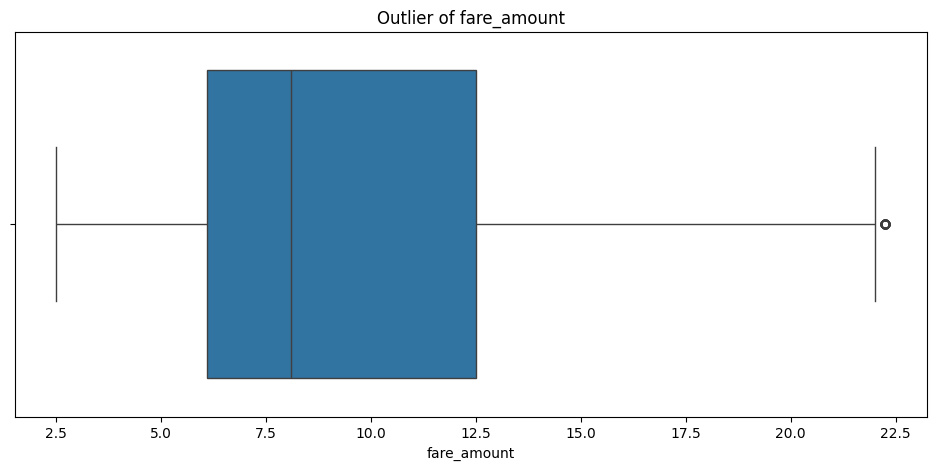

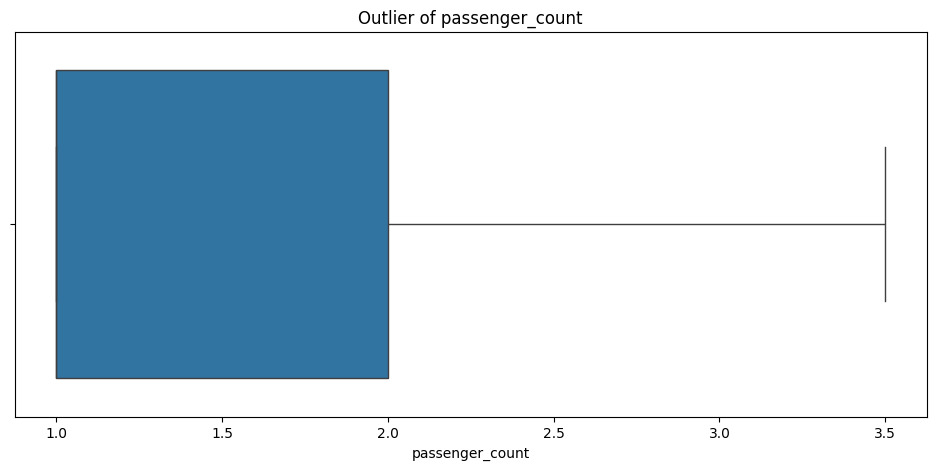

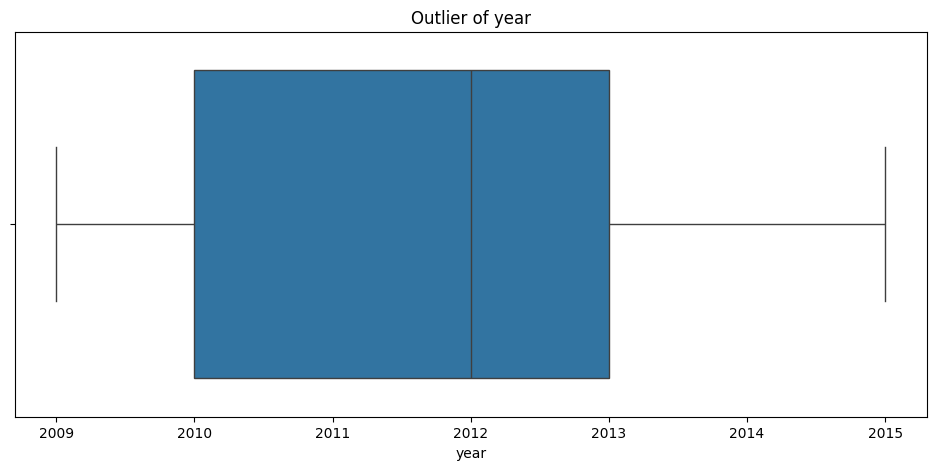

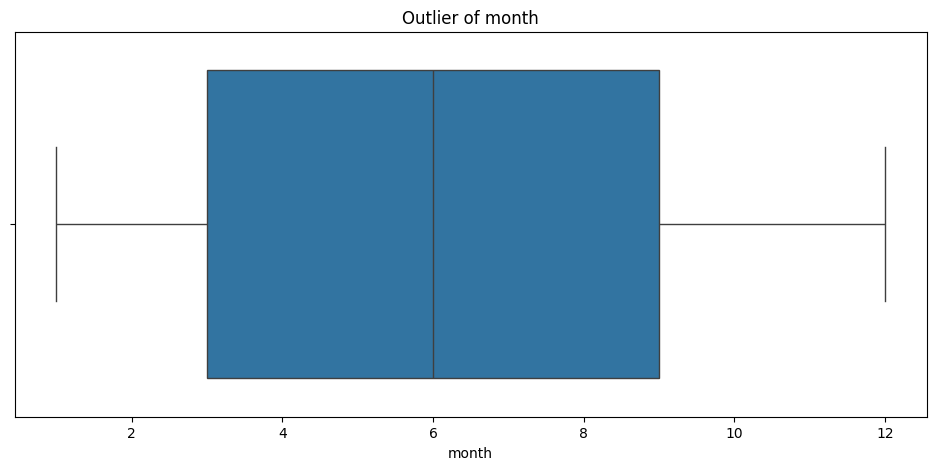

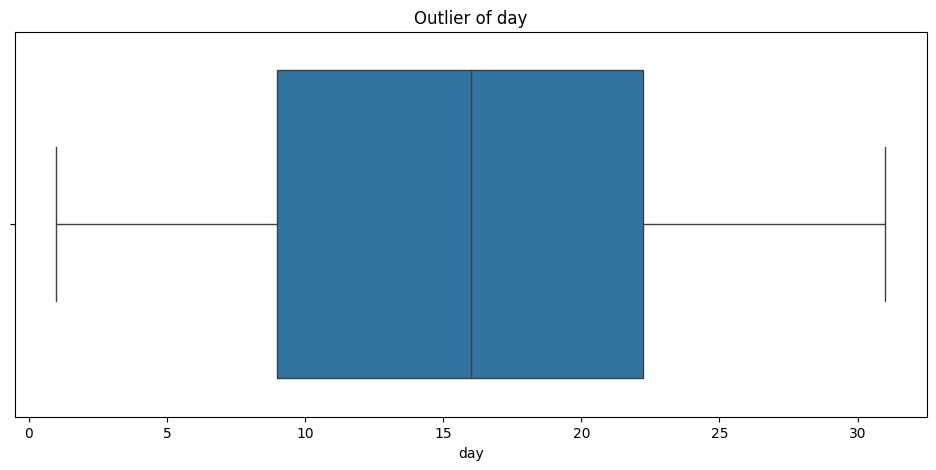

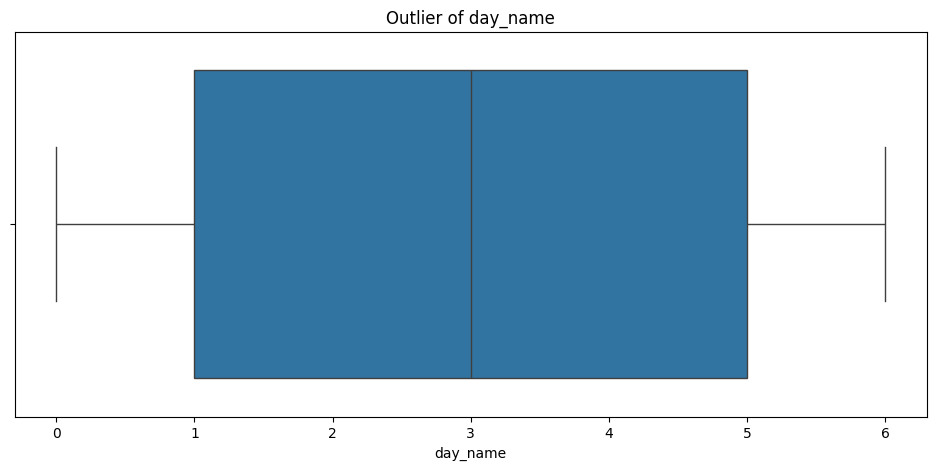

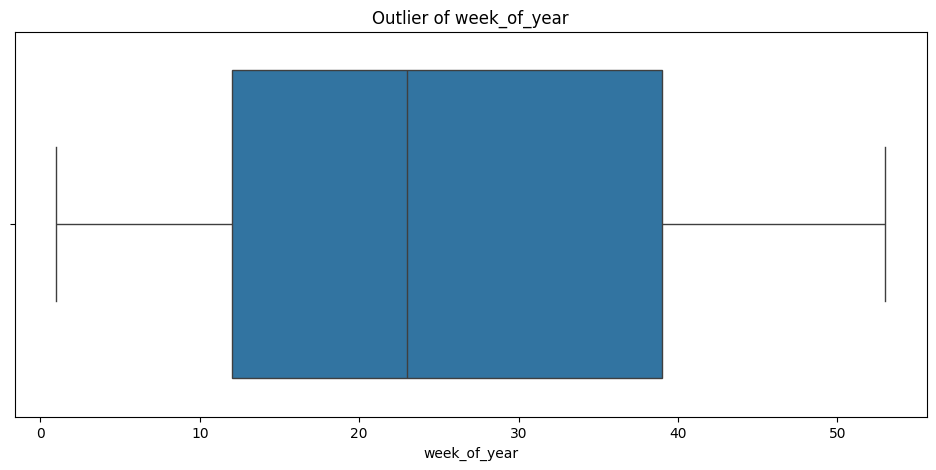

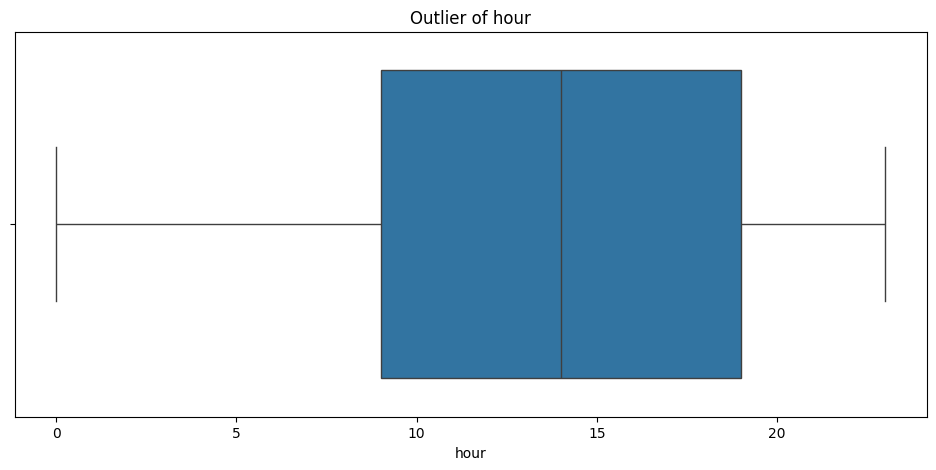

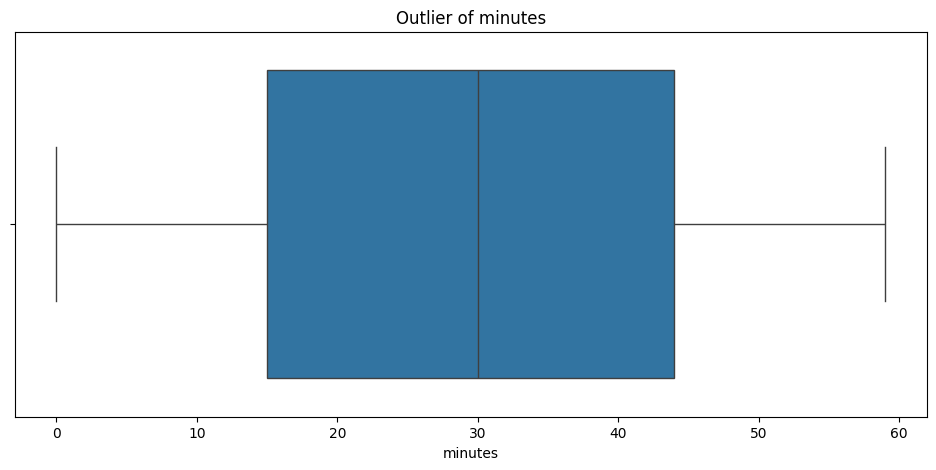

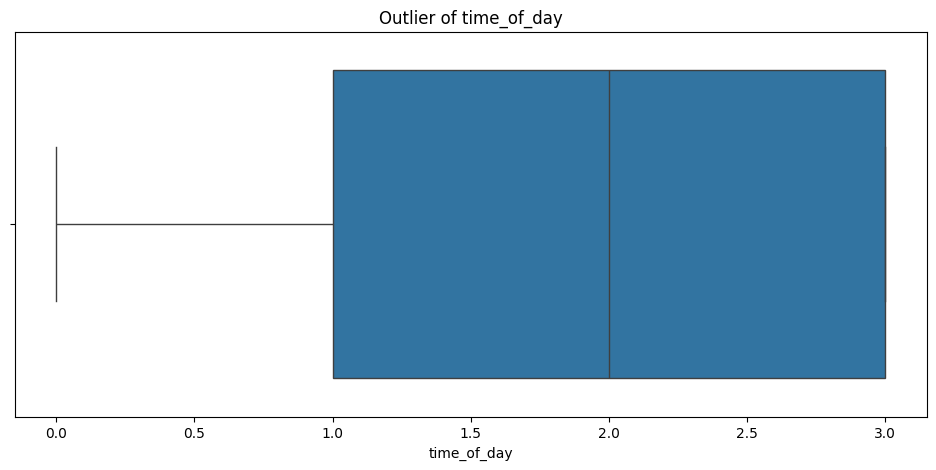

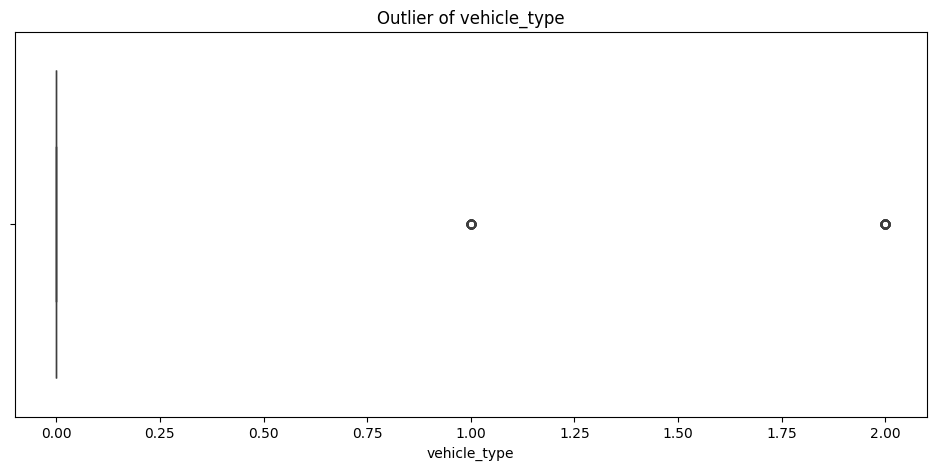

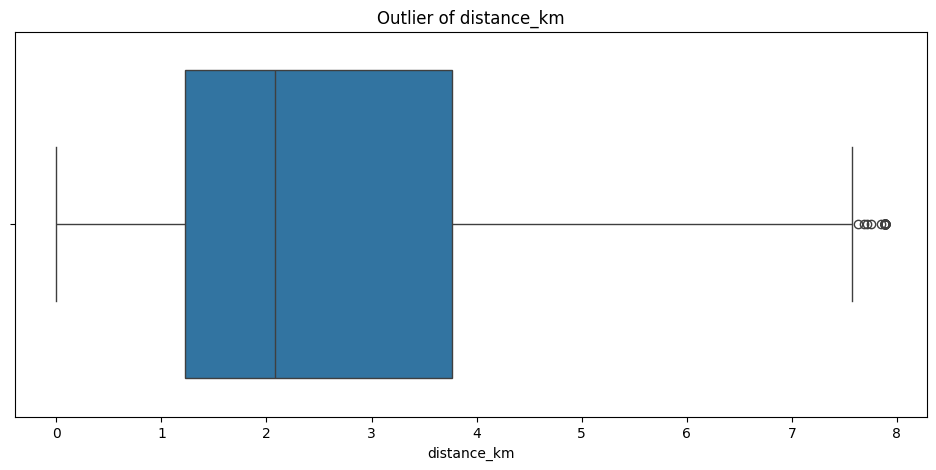

In [641]:
for i in ['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km']:
    plot_out(df_out,i)

# Skewness Handling

In [754]:
df_skew=df_out.copy()
df_skew.head()

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,1.0,2009,8,24,0,35,21,45,3,0,5.036
3,5.3,3.0,2009,6,26,4,26,8,22,0,1,1.662
4,16.0,3.5,2014,8,28,3,35,17,47,2,2,4.475


In [643]:
import matplotlib.pyplot as plt
import seaborn as sns

In [644]:
def plot(df,column):

    sampled_df = df.sample(n=min(1000, len(df)))
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=sampled_df,x=column)
    plt.title(f"Outlier of {column}")

    plt.subplot(1,3,2)
    sns.histplot(data=sampled_df,x=column, kde=True)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=sampled_df,x=column)
    plt.title(f'violin Plot for {column}')

    plt.show()


In [645]:
df_skew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195085 entries, 0 to 195084
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      195085 non-null  float64
 1   passenger_count  195085 non-null  float64
 2   year             195085 non-null  int32  
 3   month            195085 non-null  int32  
 4   day              195085 non-null  int32  
 5   day_name         195085 non-null  int64  
 6   week_of_year     195085 non-null  UInt32 
 7   hour             195085 non-null  int32  
 8   minutes          195085 non-null  int32  
 9   time_of_day      195085 non-null  int64  
 10  vehicle_type     195085 non-null  int64  
 11  distance_km      195085 non-null  float64
dtypes: UInt32(1), float64(3), int32(5), int64(3)
memory usage: 13.6 MB


In [646]:
df_skew.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km'],
      dtype='object')

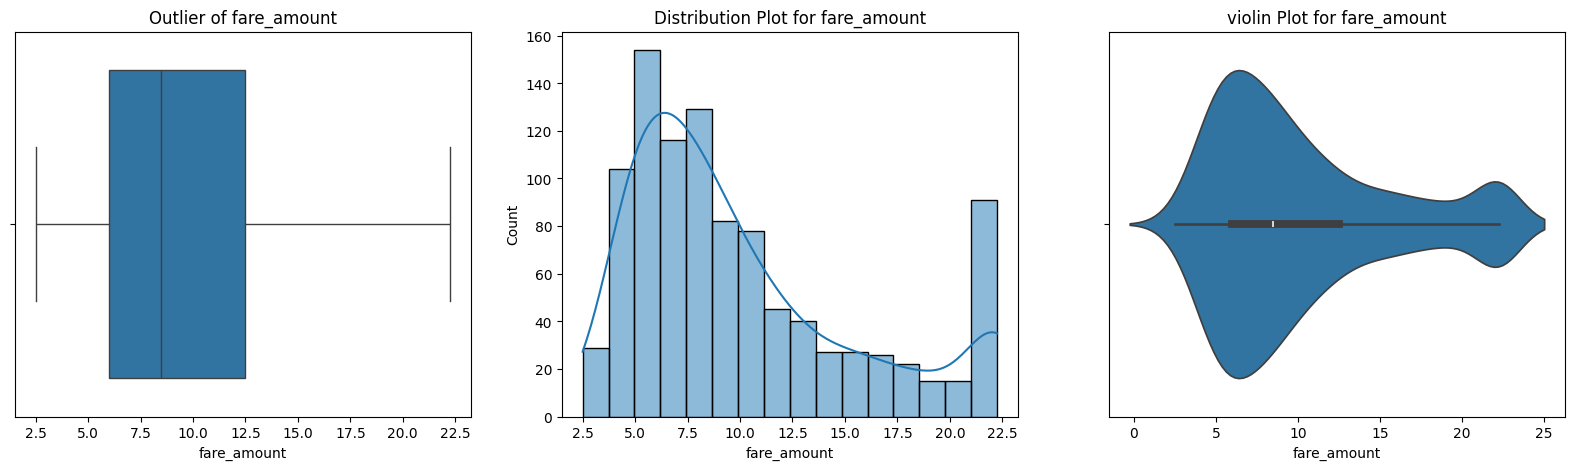

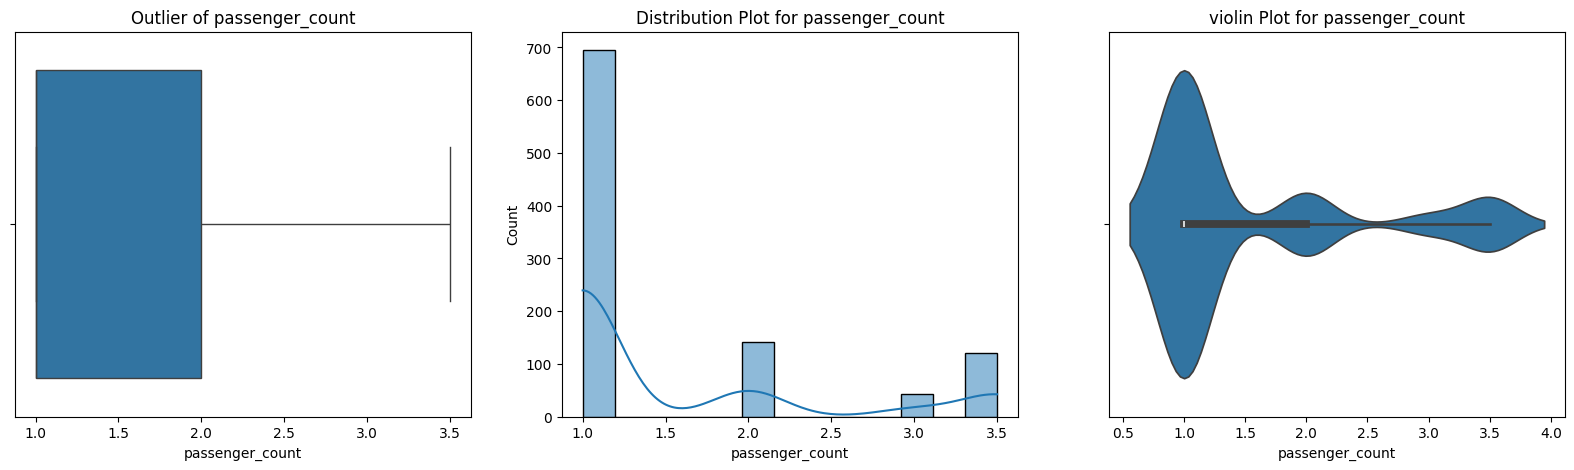

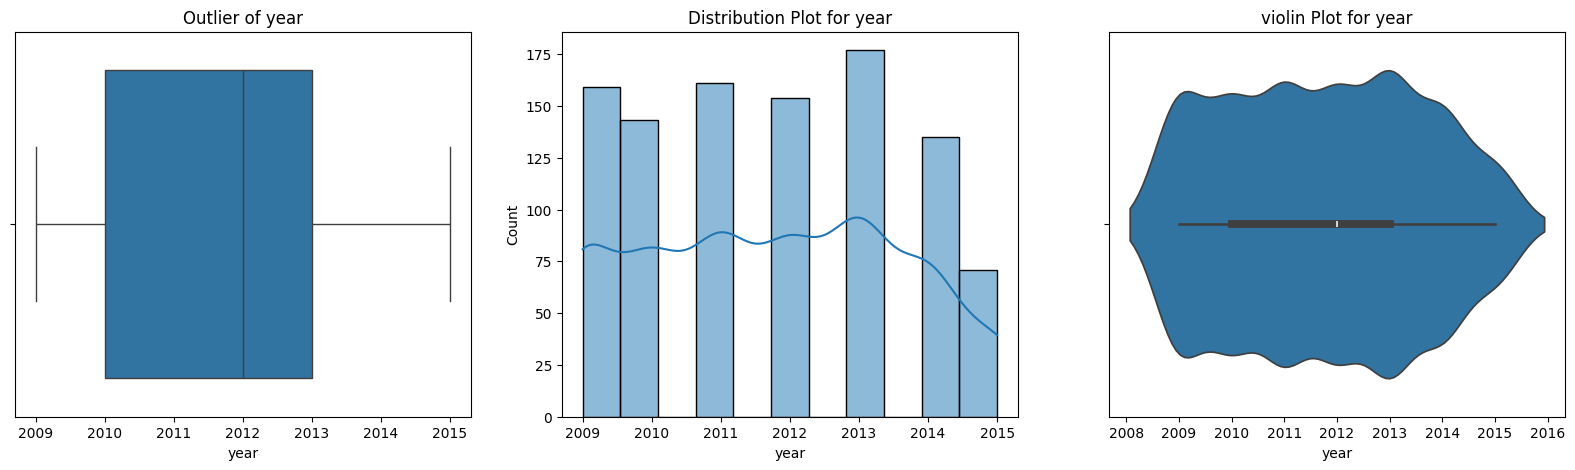

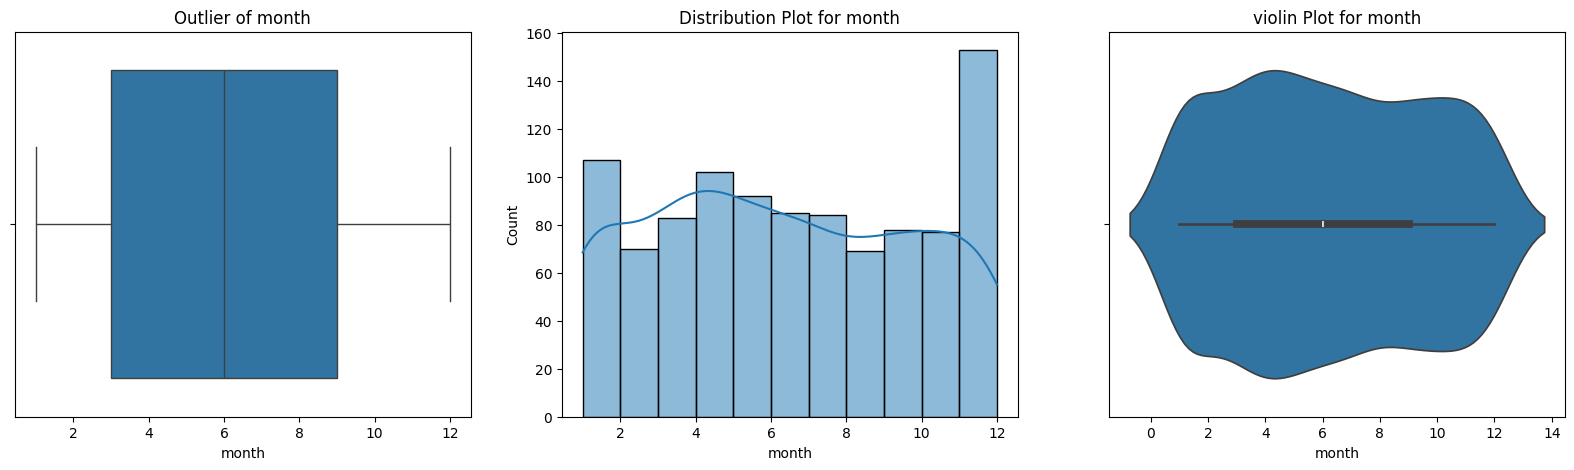

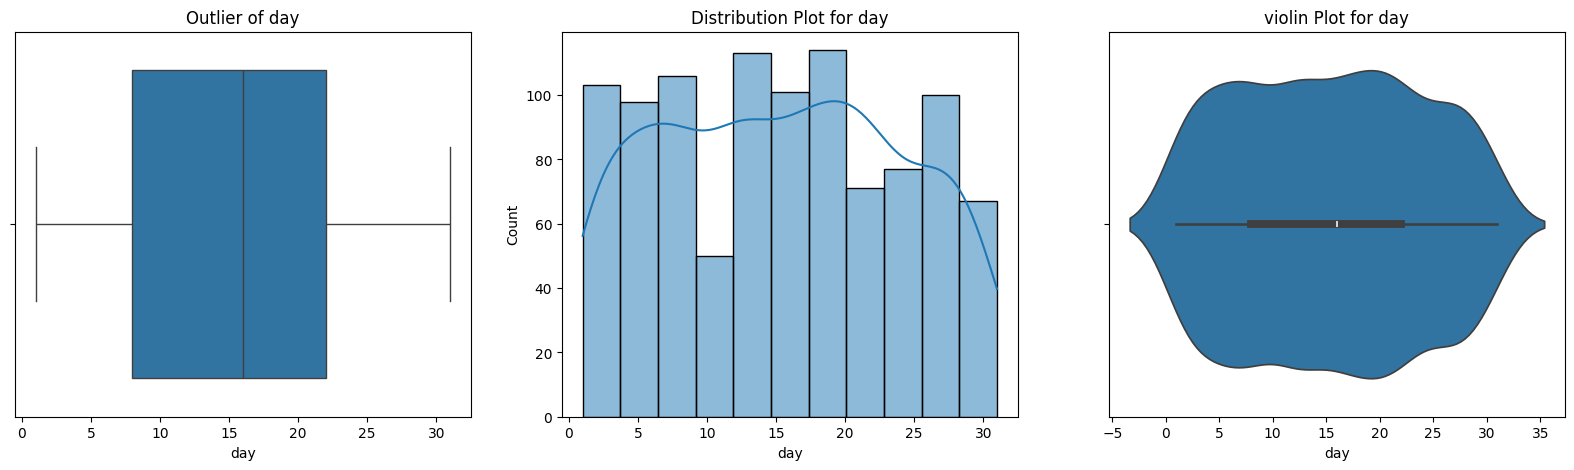

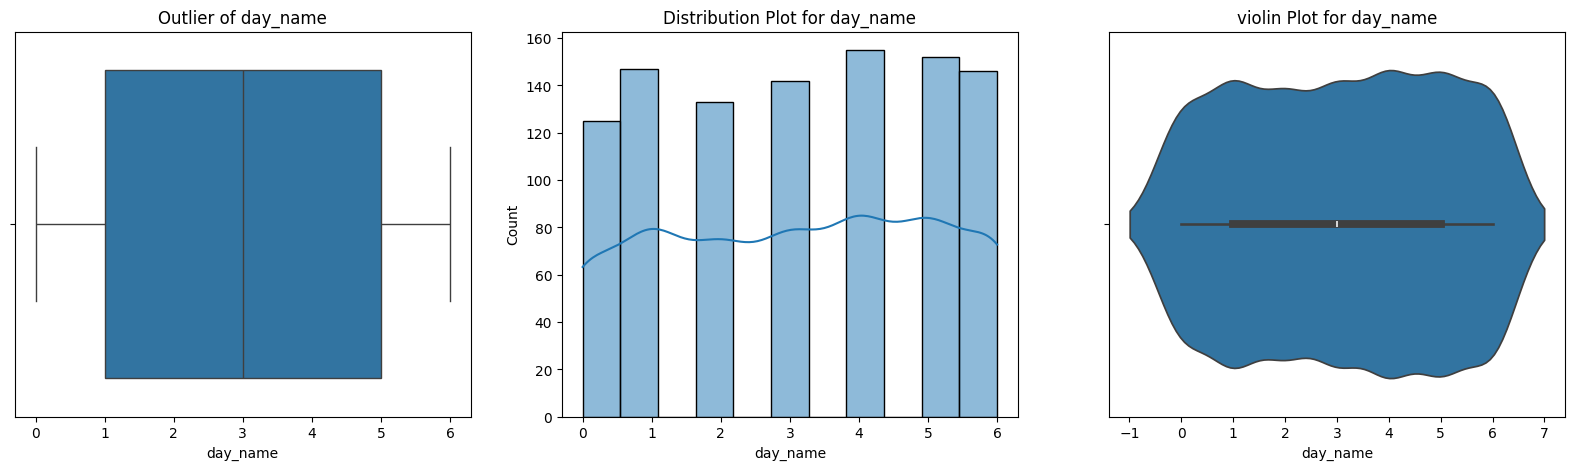

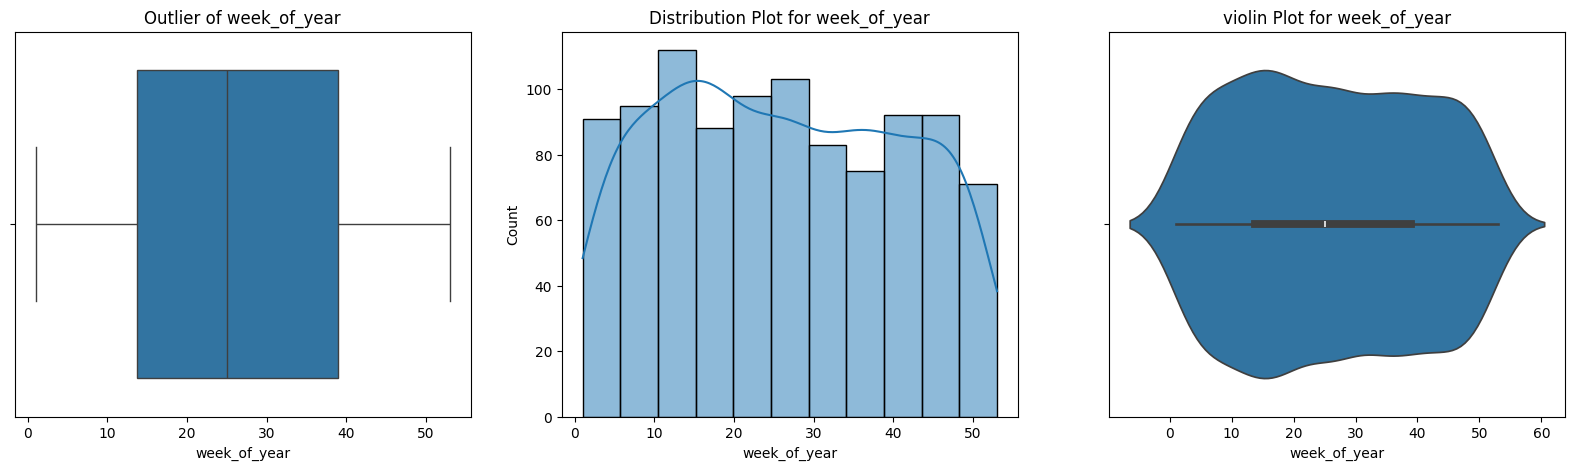

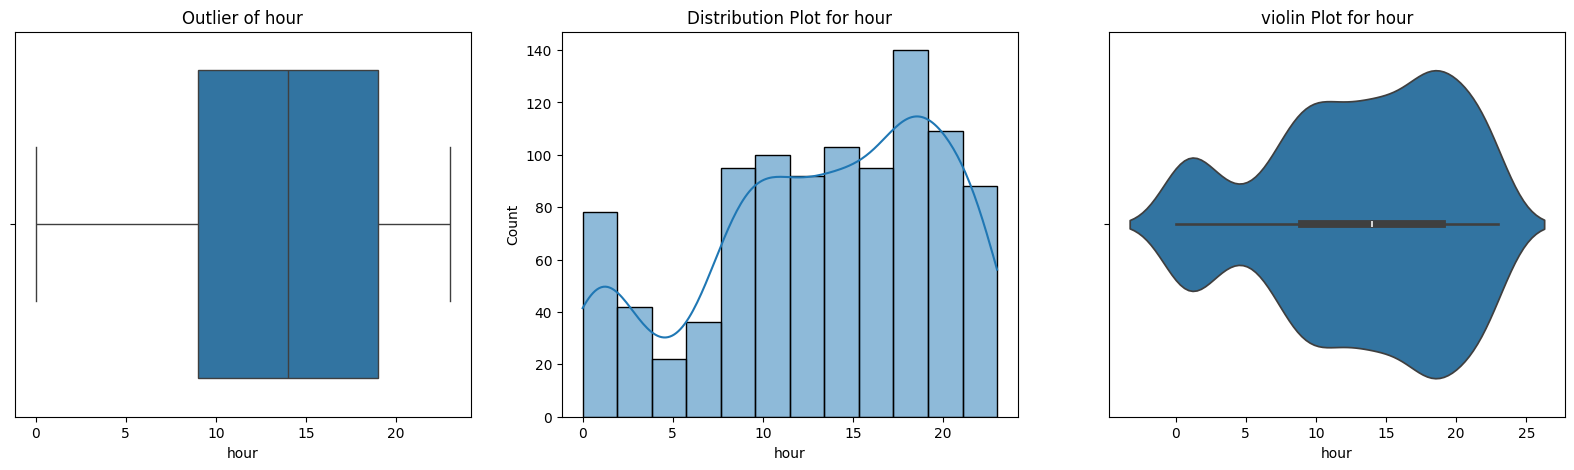

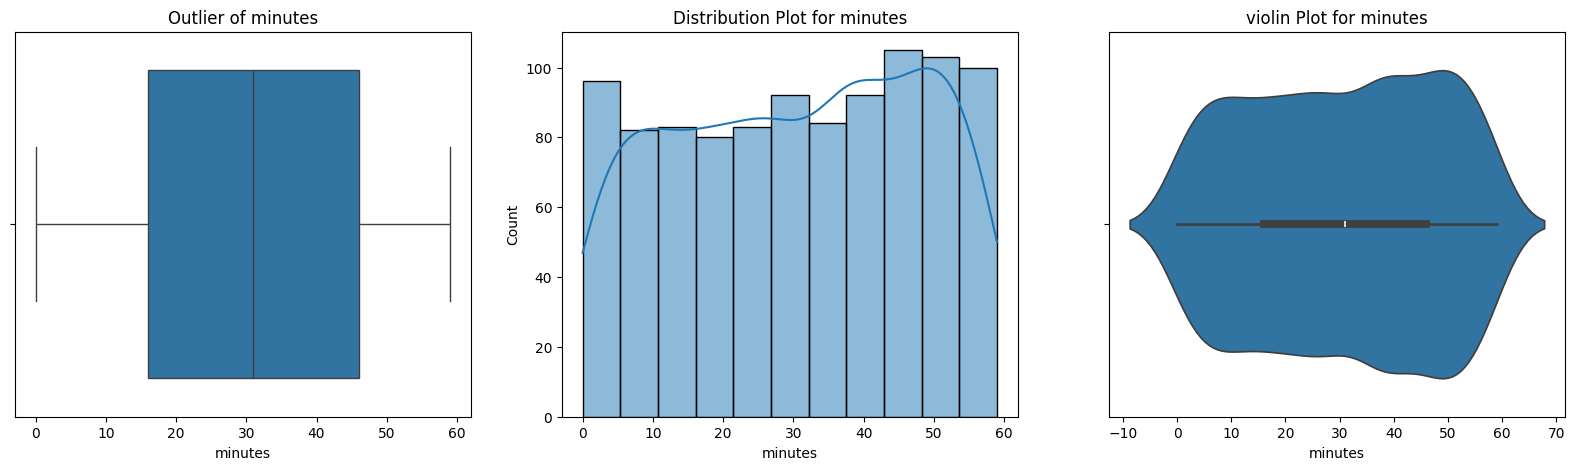

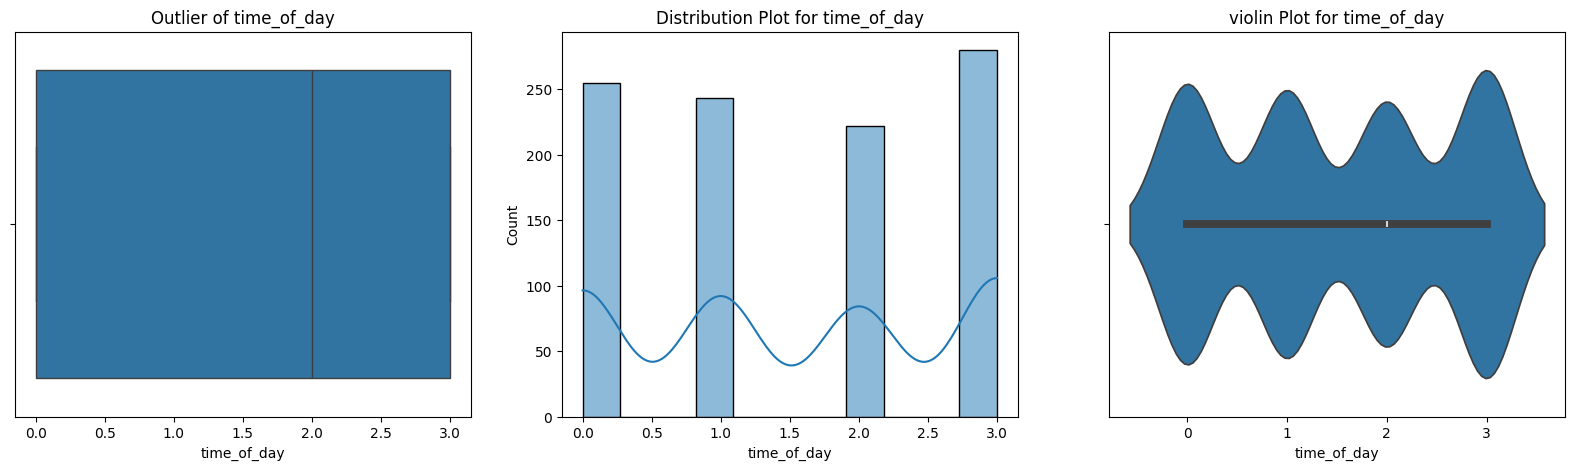

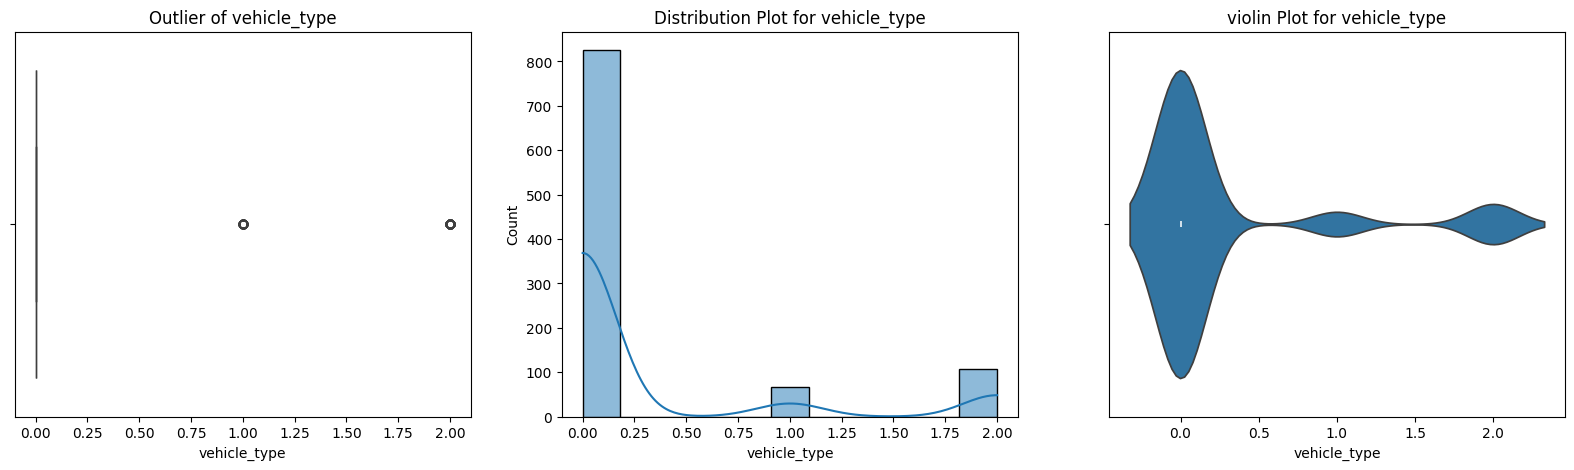

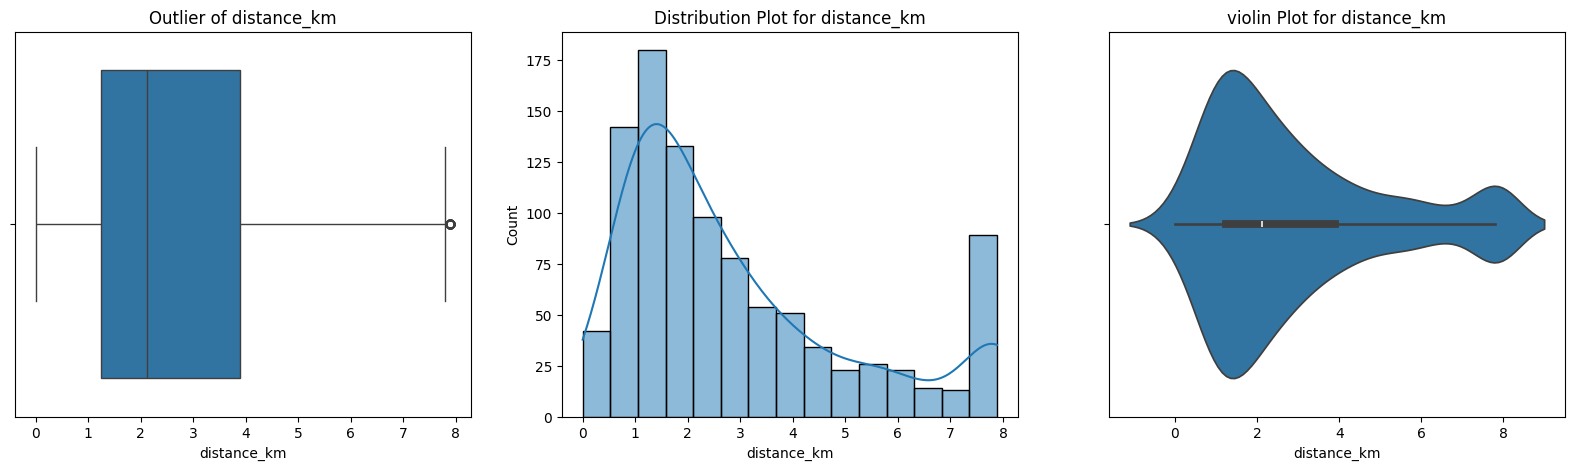

In [647]:
for i in ['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km']:
    plot(df_skew,i)

## Finding best method for skewd

In [648]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [649]:
df_skew_find=df_skew.copy()
df_skew_find

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.50,1.0,2015,5,7,3,19,19,52,2,0,1.6830
1,7.70,1.0,2009,7,17,4,29,20,4,2,0,2.4580
2,12.90,1.0,2009,8,24,0,35,21,45,3,0,5.0360
3,5.30,3.0,2009,6,26,4,26,8,22,0,1,1.6620
4,16.00,3.5,2014,8,28,3,35,17,47,2,2,4.4750
...,...,...,...,...,...,...,...,...,...,...,...,...
195080,3.00,1.0,2012,10,28,6,43,10,49,0,0,0.1120
195081,7.50,1.0,2014,3,14,4,11,1,9,3,0,1.8750
195082,22.25,2.0,2009,6,29,0,27,0,42,3,0,7.8885
195083,14.50,1.0,2015,5,20,2,21,14,56,1,0,3.5400


In [650]:
def plot_skewd(df,columns):
    
    # Log Transformation
    df['log'] = np.log1p(df[columns])

    # Square Root Transformation
    df['sqrt'] = np.sqrt(df[columns])

    # Box-Cox Transformation
    df['boxcox'], _ = boxcox(df[columns] + 1)  # Adding 1 to handle zero values

    # Yeo-Johnson Transformation
    pt = PowerTransformer(method='yeo-johnson')
    df['yeojohnson'] = pt.fit_transform(df[[columns]])

    # Quantile Transformation
    qt = QuantileTransformer(output_distribution='normal')
    df['quantile'] = qt.fit_transform(df[[columns]])

    plt.figure(figsize=(20, 10))

    # Original Distribution
    plt.subplot(2, 3, 1)
    sns.histplot(df[columns], kde=True)
    plt.title('Original Distribution')

    # Log Transformation
    plt.subplot(2, 3, 2)
    sns.histplot(df['log'], kde=True)
    plt.title('Log Transformation')

    # Square Root Transformation
    plt.subplot(2, 3, 3)
    sns.histplot(df['sqrt'], kde=True)
    plt.title('Square Root Transformation')

    # Box-Cox Transformation
    plt.subplot(2, 3, 4)
    sns.histplot(df['boxcox'], kde=True)
    plt.title('Box-Cox Transformation')

    # Yeo-Johnson Transformation
    plt.subplot(2, 3, 5)
    sns.histplot(df['yeojohnson'], kde=True)
    plt.title('Yeo-Johnson Transformation')

    # Quantile Transformation
    plt.subplot(2, 3, 6)
    sns.histplot(df['quantile'], kde=True)
    plt.title('Quantile Transformation')

    plt.tight_layout()
    plt.show()


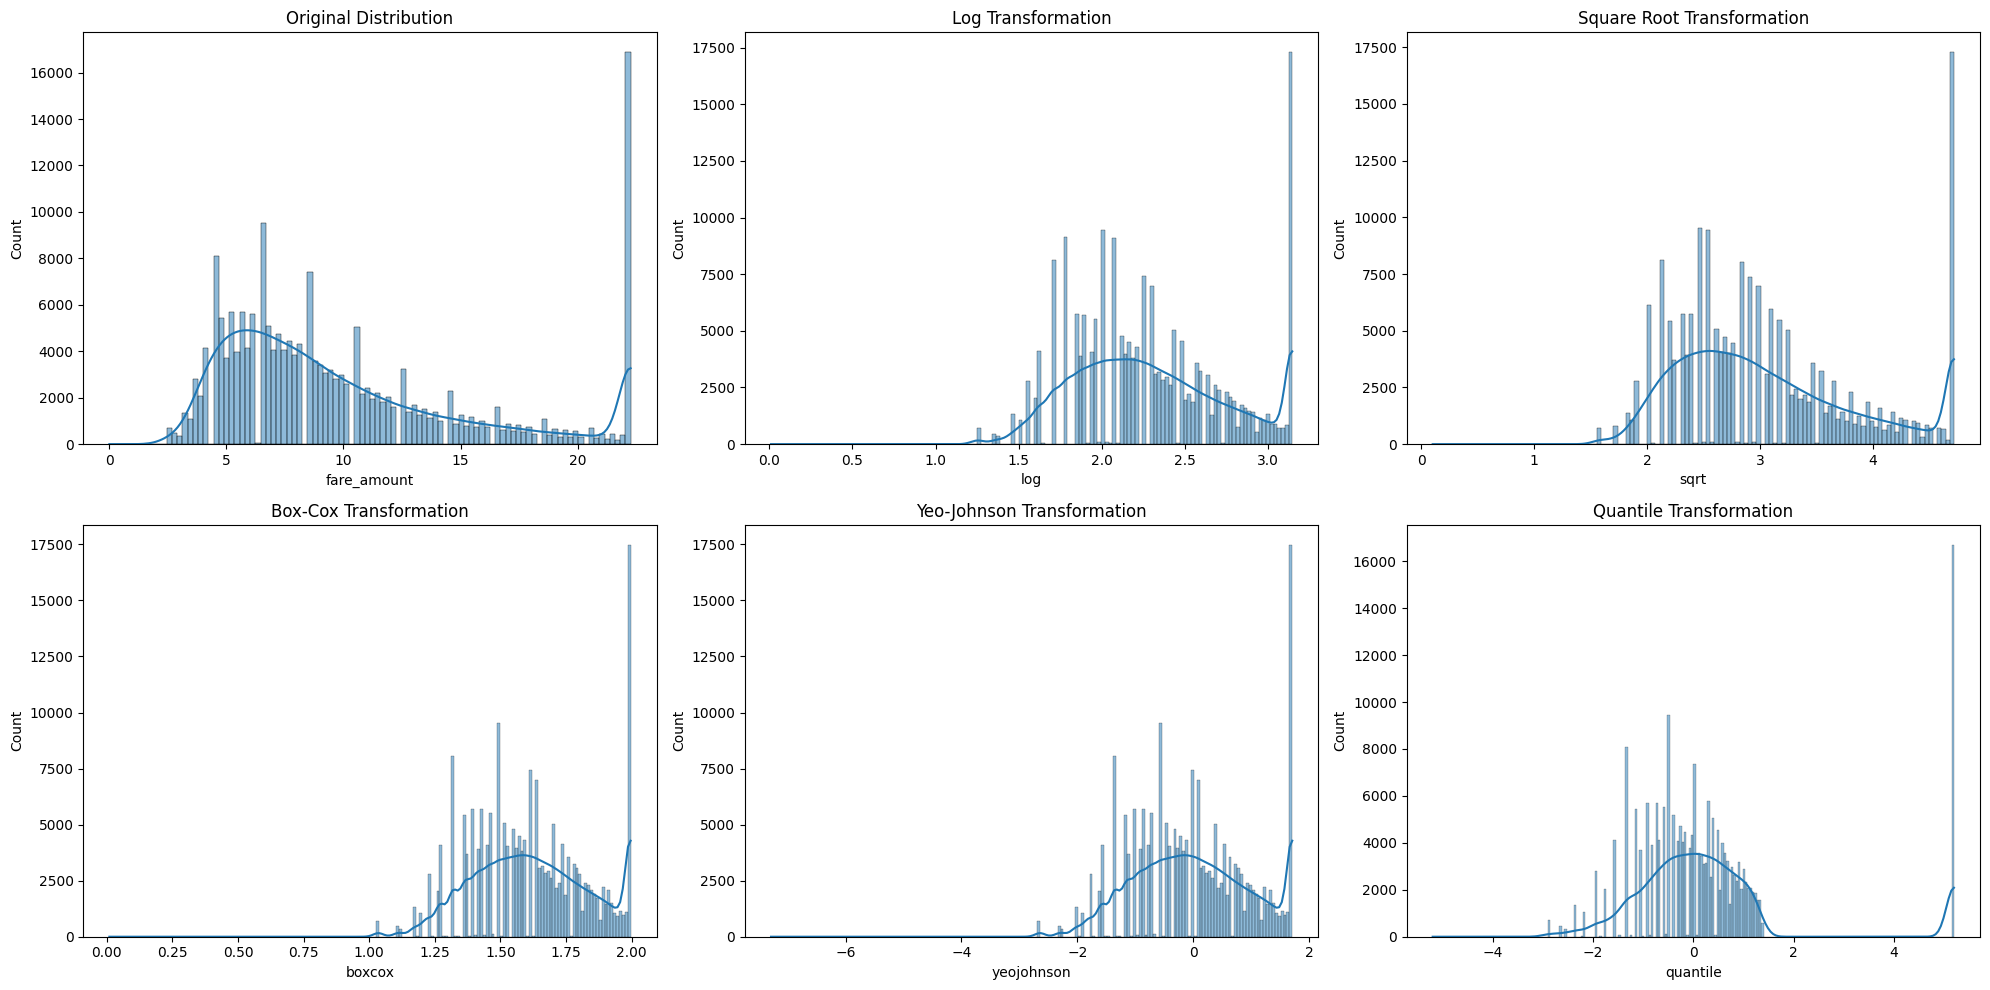

In [651]:
plot_skewd(df_skew_find,"fare_amount")

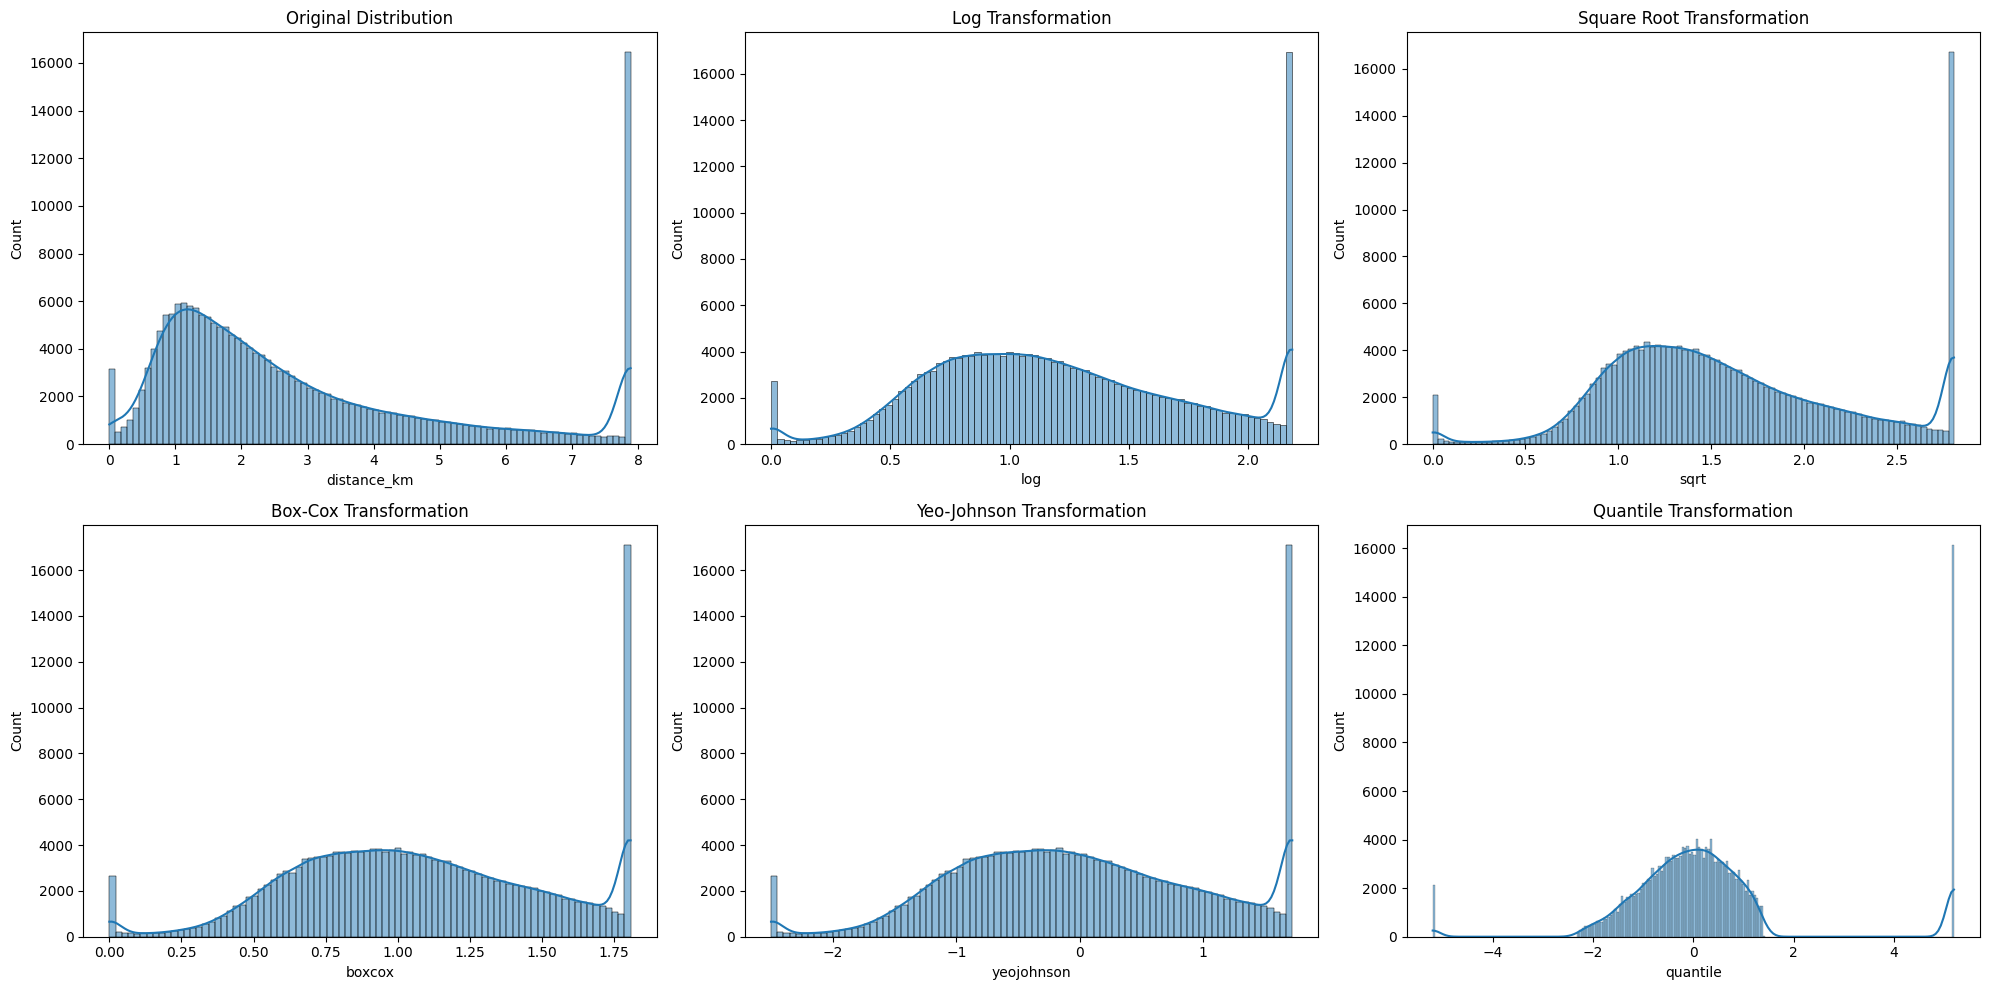

In [652]:
plot_skewd(df_skew_find,'distance_km')

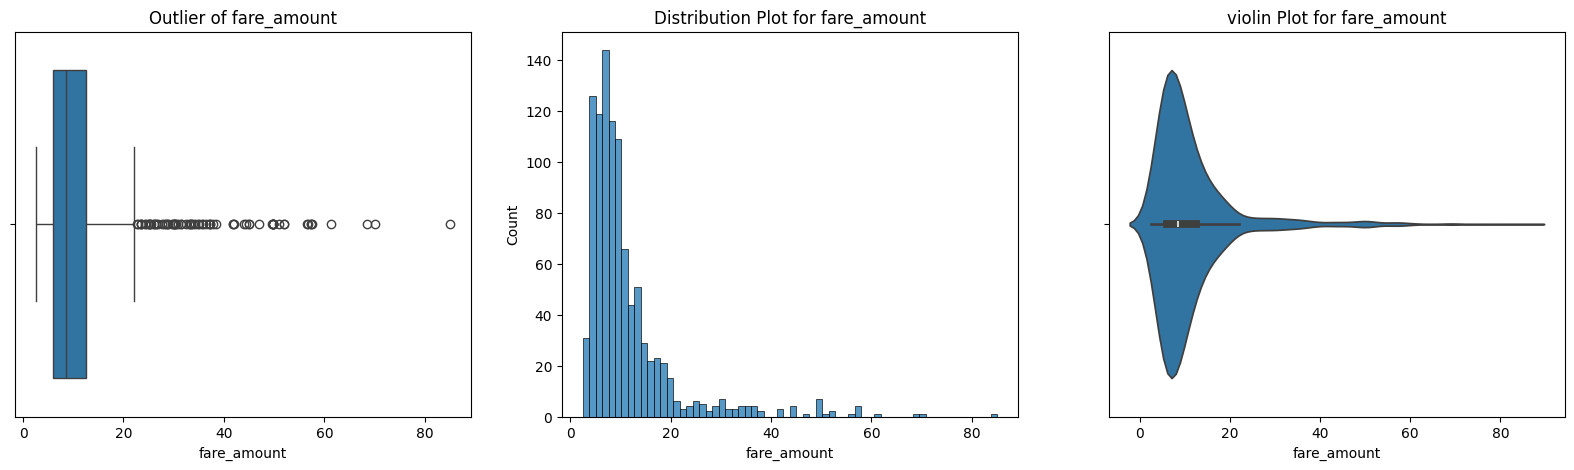

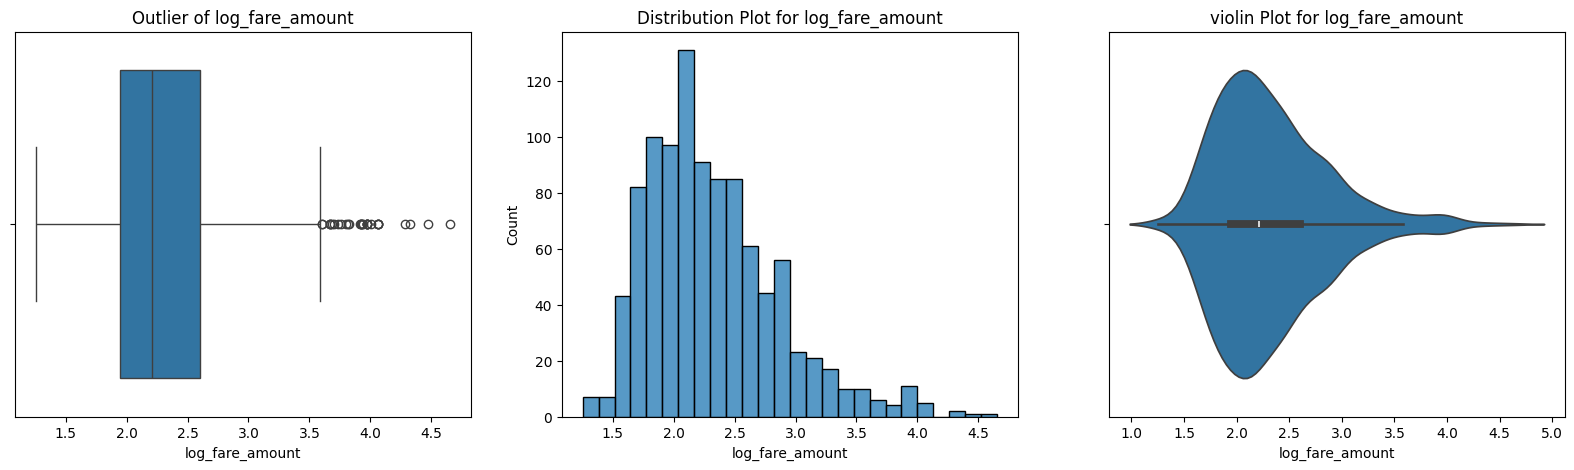

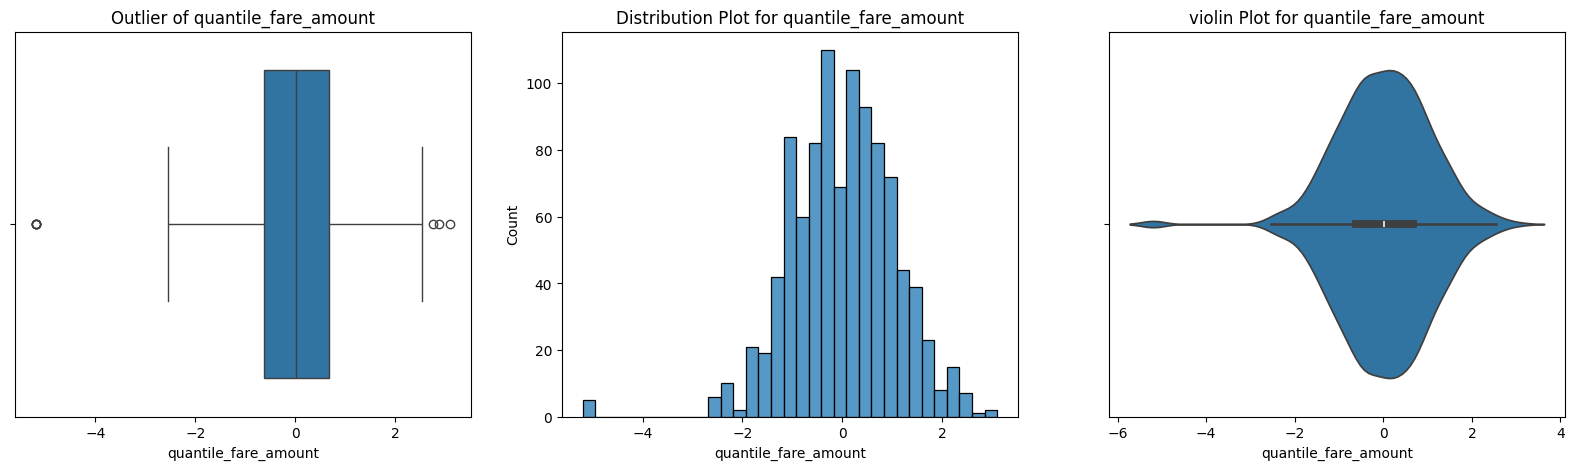

In [ ]:
for i in ["fare_amount","log_fare_amount","quantile_fare_amount"]:
    plot(df4, i)

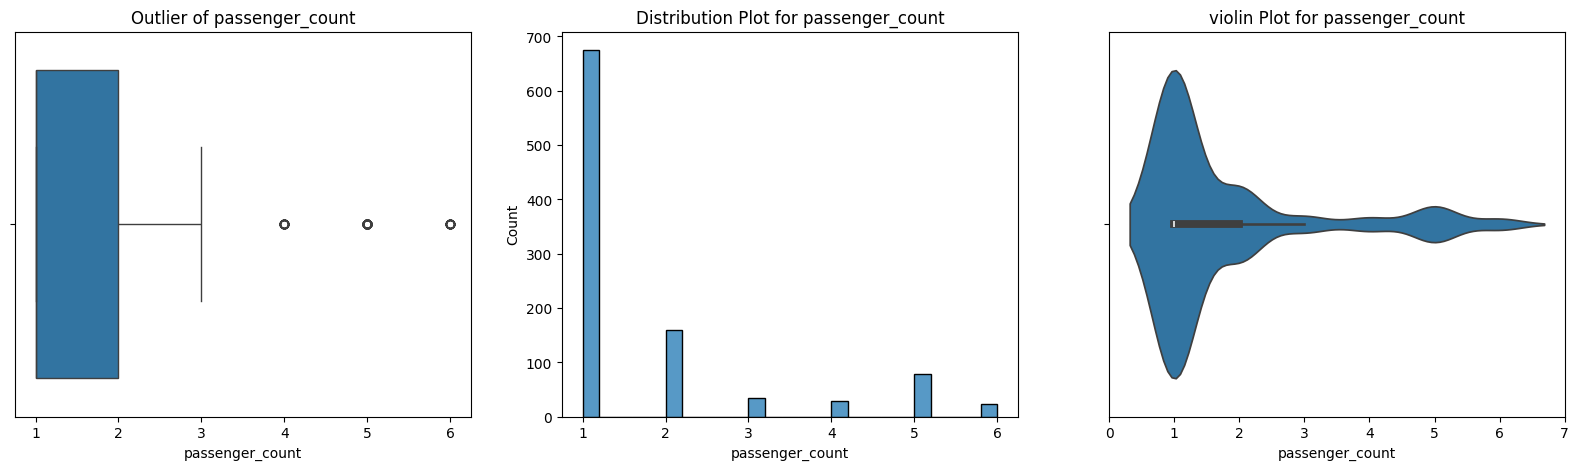

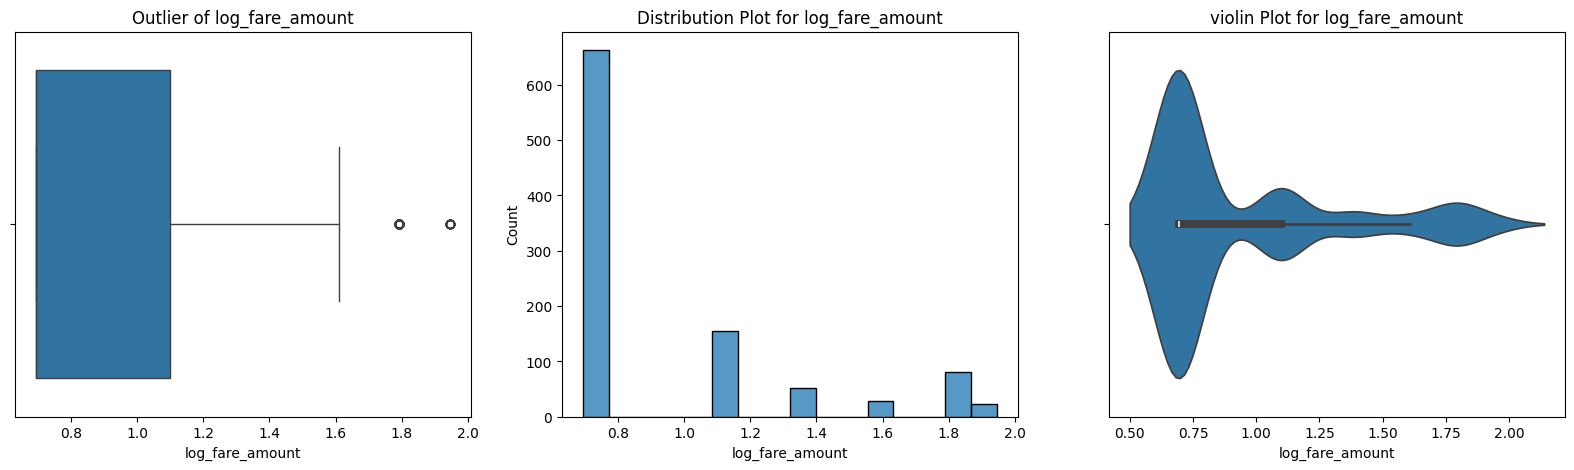

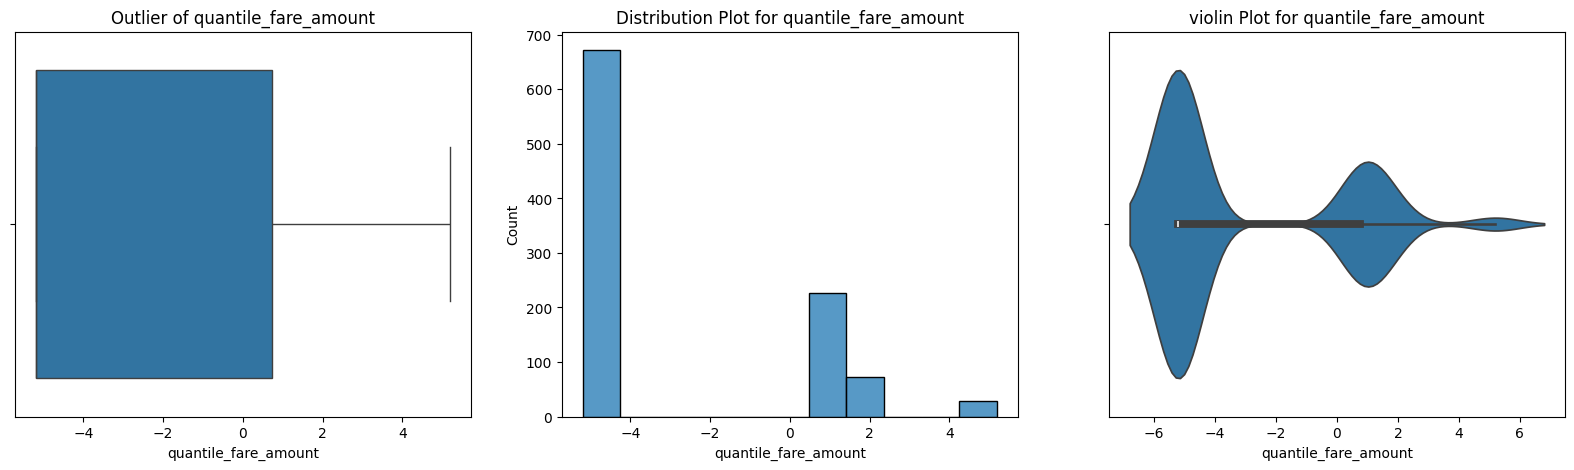

In [ ]:
for i in ["passenger_count","log_fare_amount","quantile_fare_amount"]:
    plot(df4, i)

from the above conclusion is says that log transform is good to handle skweness

In [756]:
df_skew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195085 entries, 0 to 195084
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      195085 non-null  float64
 1   passenger_count  195085 non-null  float64
 2   year             195085 non-null  int32  
 3   month            195085 non-null  int32  
 4   day              195085 non-null  int32  
 5   day_name         195085 non-null  int64  
 6   week_of_year     195085 non-null  UInt32 
 7   hour             195085 non-null  int32  
 8   minutes          195085 non-null  int32  
 9   time_of_day      195085 non-null  int64  
 10  vehicle_type     195085 non-null  int64  
 11  distance_km      195085 non-null  float64
dtypes: UInt32(1), float64(3), int32(5), int64(3)
memory usage: 13.6 MB


In [654]:
df_skew['fare_amount_log'] = np.log(df_skew['fare_amount'])



df_skew

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km,fare_amount_log
0,7.50,1.0,2015,5,7,3,19,19,52,2,0,1.6830,2.014903
1,7.70,1.0,2009,7,17,4,29,20,4,2,0,2.4580,2.041220
2,12.90,1.0,2009,8,24,0,35,21,45,3,0,5.0360,2.557227
3,5.30,3.0,2009,6,26,4,26,8,22,0,1,1.6620,1.667707
4,16.00,3.5,2014,8,28,3,35,17,47,2,2,4.4750,2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195080,3.00,1.0,2012,10,28,6,43,10,49,0,0,0.1120,1.098612
195081,7.50,1.0,2014,3,14,4,11,1,9,3,0,1.8750,2.014903
195082,22.25,2.0,2009,6,29,0,27,0,42,3,0,7.8885,3.102342
195083,14.50,1.0,2015,5,20,2,21,14,56,1,0,3.5400,2.674149


## Before  and After Skwness

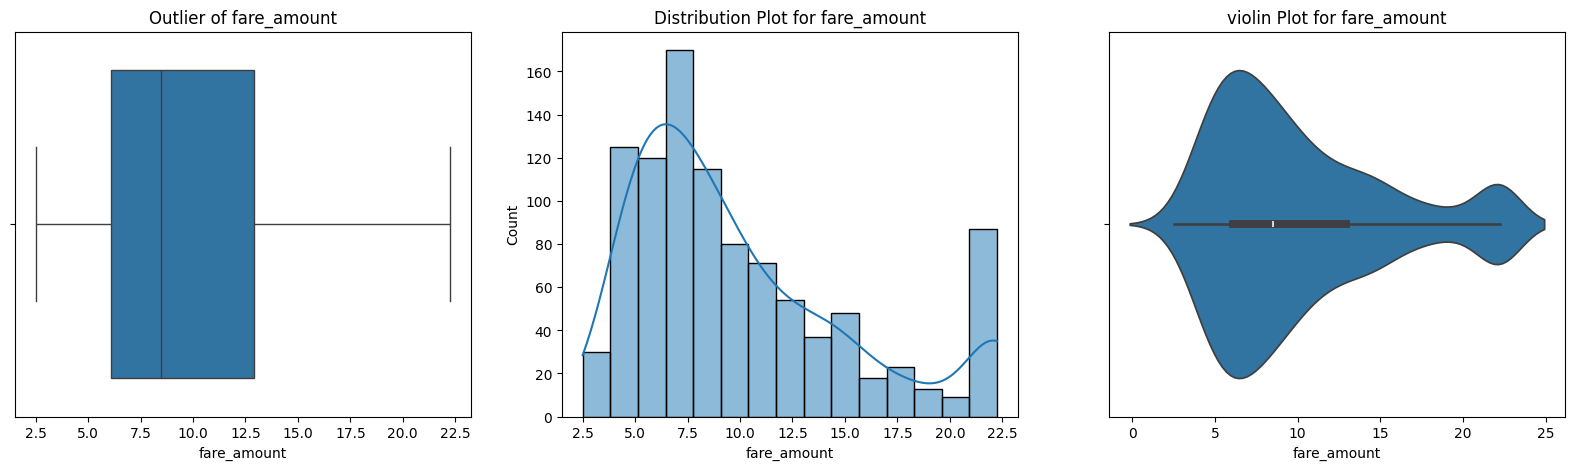

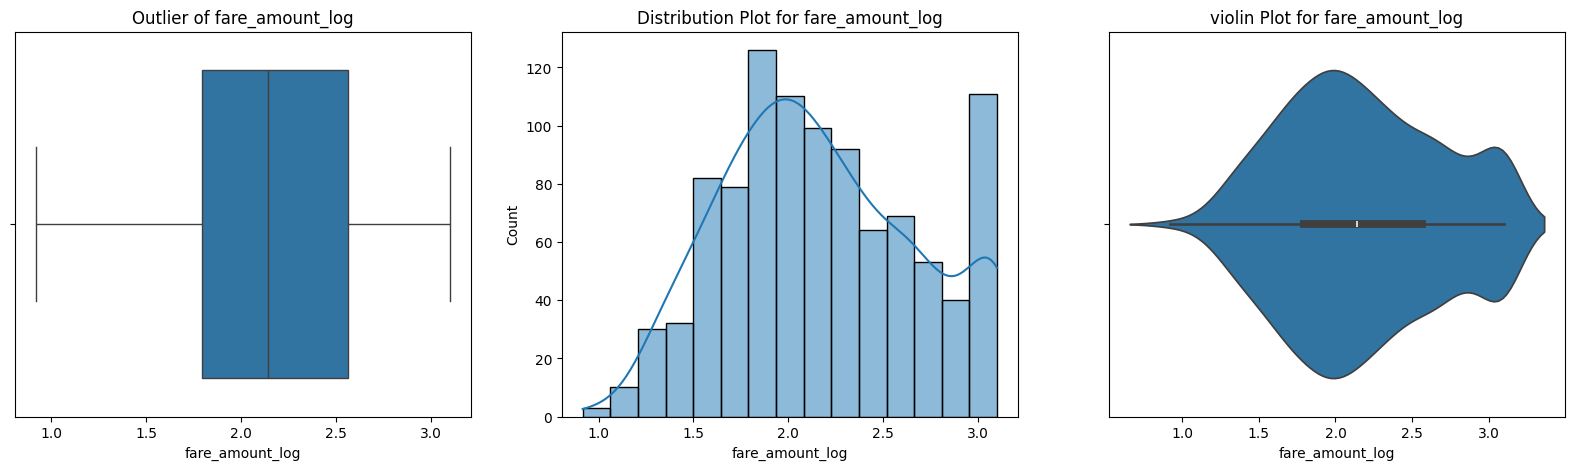

In [655]:
for i in ["fare_amount","fare_amount_log"]:
    plot(df_skew,i)

In [656]:
df_skew=df_skew.drop(columns=["fare_amount"])
df_skew


,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km,fare_amount_log
0,1.0,2015,5,7,3,19,19,52,2,0,1.6830,2.014903
1,1.0,2009,7,17,4,29,20,4,2,0,2.4580,2.041220
2,1.0,2009,8,24,0,35,21,45,3,0,5.0360,2.557227
3,3.0,2009,6,26,4,26,8,22,0,1,1.6620,1.667707
4,3.5,2014,8,28,3,35,17,47,2,2,4.4750,2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...
195080,1.0,2012,10,28,6,43,10,49,0,0,0.1120,1.098612
195081,1.0,2014,3,14,4,11,1,9,3,0,1.8750,2.014903
195082,2.0,2009,6,29,0,27,0,42,3,0,7.8885,3.102342
195083,1.0,2015,5,20,2,21,14,56,1,0,3.5400,2.674149


# Highly correlated using Heatmap

In [657]:
import seaborn as sns

In [757]:
df_h=df_skew.copy()
df_h.head(3)

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,1.0,2009,8,24,0,35,21,45,3,0,5.036


In [758]:
df_h.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km'],
      dtype='object')

<Axes: >

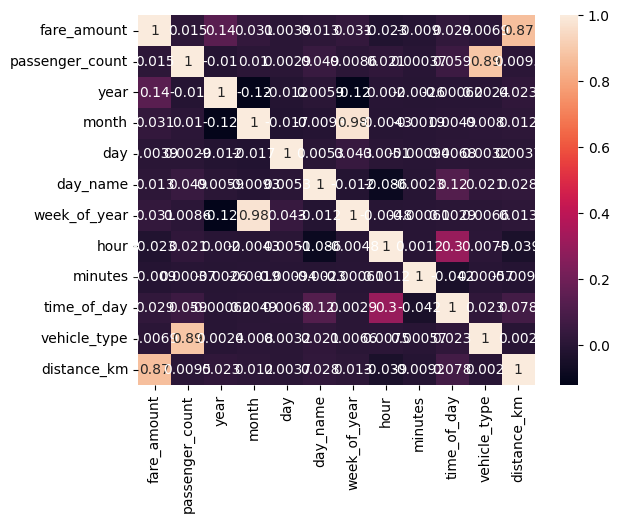

In [760]:

col = ['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km']
df_heatmap = df_h[col].corr()
sns.heatmap(df_heatmap, annot=True)

# Final Dataframe

In [761]:
df_final=df_skew.copy()
df_final.head()

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,1.0,2009,8,24,0,35,21,45,3,0,5.036
3,5.3,3.0,2009,6,26,4,26,8,22,0,1,1.662
4,16.0,3.5,2014,8,28,3,35,17,47,2,2,4.475


# Regression Method - Prdict Fare_amount

## Importing Libraries

In [662]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
     

In [762]:
df_final.head(3)

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,1.0,2009,8,24,0,35,21,45,3,0,5.036


In [763]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195085 entries, 0 to 195084
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      195085 non-null  float64
 1   passenger_count  195085 non-null  float64
 2   year             195085 non-null  int32  
 3   month            195085 non-null  int32  
 4   day              195085 non-null  int32  
 5   day_name         195085 non-null  int64  
 6   week_of_year     195085 non-null  UInt32 
 7   hour             195085 non-null  int32  
 8   minutes          195085 non-null  int32  
 9   time_of_day      195085 non-null  int64  
 10  vehicle_type     195085 non-null  int64  
 11  distance_km      195085 non-null  float64
dtypes: UInt32(1), float64(3), int32(5), int64(3)
memory usage: 13.6 MB


In [764]:
df_final.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day', 'day_name',
       'week_of_year', 'hour', 'minutes', 'time_of_day', 'vehicle_type',
       'distance_km'],
      dtype='object')

## Selecting the good model

In [765]:
def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['fare_amount'], axis=1)
    y = df['fare_amount']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [766]:

print(machine_learning_regression(df_final, LinearRegression))
print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))
print(machine_learning_regression(df_final, XGBRegressor))

{'algorithm': 'LinearRegression', 'R2_train': 0.7782948339861625, 'R2_test': 0.7781888518868224}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.999974900364935, 'R2_test': 0.5958307213238695}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.999974900364935, 'R2_test': 0.800852722489765}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9724845183999142, 'R2_test': 0.8061027930710064}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7457067010249827, 'R2_test': 0.7462266007081957}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8137044035263474, 'R2_test': 0.8135219050847243}
{'algorithm': 'XGBRegressor', 'R2_train': 0.8437377244043648, 'R2_test': 0.8133829358831413}


{'algorithm': 'LinearRegression', 'R2_train': 0.7535143159658828, 'R2_test': 0.7426313094519591}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999967996877831, 'R2_test': 0.6024025108050464}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999967996877831, 'R2_test': 0.79944275221336}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9731470019322044, 'R2_test': 0.8037980295186012}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6483693086640974, 'R2_test': 0.6454123365083224}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8001566268086151, 'R2_test': 0.7912341791966111}
{'algorithm': 'XGBRegressor', 'R2_train': 0.8580409556063343, 'R2_test': 0.8198425101718957}

# Linear regression model

In [767]:
df_final.head()

,fare_amount,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,7.5,1.0,2015,5,7,3,19,19,52,2,0,1.683
1,7.7,1.0,2009,7,17,4,29,20,4,2,0,2.458
2,12.9,1.0,2009,8,24,0,35,21,45,3,0,5.036
3,5.3,3.0,2009,6,26,4,26,8,22,0,1,1.662
4,16.0,3.5,2014,8,28,3,35,17,47,2,2,4.475


In [769]:
x=df_final.drop(['fare_amount'],axis=1)
y=df_final['fare_amount']


In [770]:
x

,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
0,1.0,2015,5,7,3,19,19,52,2,0,1.6830
1,1.0,2009,7,17,4,29,20,4,2,0,2.4580
2,1.0,2009,8,24,0,35,21,45,3,0,5.0360
3,3.0,2009,6,26,4,26,8,22,0,1,1.6620
4,3.5,2014,8,28,3,35,17,47,2,2,4.4750
...,...,...,...,...,...,...,...,...,...,...,...
195080,1.0,2012,10,28,6,43,10,49,0,0,0.1120
195081,1.0,2014,3,14,4,11,1,9,3,0,1.8750
195082,2.0,2009,6,29,0,27,0,42,3,0,7.8885
195083,1.0,2015,5,20,2,21,14,56,1,0,3.5400


In [772]:
y

0          7.50
1          7.70
2         12.90
3          5.30
4         16.00
          ...  
195080     3.00
195081     7.50
195082    22.25
195083    14.50
195084    14.10
Name: fare_amount, Length: 195085, dtype: float64

In [773]:
x.shape,y.shape

((195085, 11), (195085,))

In [774]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [775]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [777]:
model.score(x_test,y_test)

0.7781888518868224

In [778]:
x_test

,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
84955,1.0,2011,6,14,1,24,10,57,0,0,1.787
74214,3.0,2014,7,24,3,30,20,25,2,1,2.136
192429,2.0,2010,7,25,6,29,4,1,3,0,6.800
53967,1.0,2009,10,22,3,43,7,26,0,0,2.818
99094,1.0,2013,5,1,2,18,8,6,0,0,3.387
...,...,...,...,...,...,...,...,...,...,...,...
13985,1.0,2011,12,16,4,50,17,37,2,0,1.056
124727,2.0,2011,9,26,0,39,7,15,0,0,3.028
71070,3.5,2009,2,10,1,7,19,43,2,2,2.759
188554,1.0,2012,11,12,0,46,20,48,2,0,3.569


In [779]:
y_test

84955      6.1
74214      9.0
192429    12.1
53967      7.3
99094     13.0
          ... 
13985      4.9
124727    11.3
71070      6.9
188554    15.5
143847     4.9
Name: fare_amount, Length: 39017, dtype: float64

## TESTING

In [280]:
user_data = np.array([[-74.000458,40.723990,-73.989682,40.725797,1.0,2014,12,8,0,50,23,26,3,0,0.930]])
y_pred = model.predict(user_data)
y_pred[0]

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(7.138450904674755)

In [281]:
user_data = np.array([[-73.984033,40.733817,-73.982888,40.777028,1.0,2010,10,20,2,42,8,29,0,0,4.806]])
y_pred = model.predict(user_data)
y_pred[0]

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(13.537702193971882)

# RandomForestRegressor

In [207]:
x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 np.float64(0.8104922057143371))

In [670]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 np.float64(0.8104922057143371))

In [781]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9073614696515806, 0.8124825669306447)

In [674]:
y_test

84955     1.808289
74214     2.197225
192429    2.493205
53967     1.987874
99094     2.564949
            ...   
13985     1.589235
124727    2.424803
71070     1.931521
188554    2.740840
143847    1.589235
Name: fare_amount_log, Length: 39017, dtype: float64

In [675]:
y_pred_test

array([1.9686125 , 2.21000572, 2.76943897, ..., 2.24106006, 2.50893592,
       1.85652324])

In [783]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_RF = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_RF.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.8072684715440476,
 'Mean Absolute Error': np.float64(1.594161153180896),
 'Mean Squared Error': np.float64(5.717568359629921),
 'Root Mean Squared Error': np.float64(2.391143734623647)}

## TESTING

In [785]:
x_train

,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
148271,1.0,2012,12,9,6,49,18,5,2,0,1.358
66549,1.0,2010,12,24,4,51,10,52,0,0,1.317
121241,1.0,2010,12,14,1,50,20,13,2,0,3.508
112578,1.0,2013,3,24,6,12,17,0,2,0,6.720
98809,1.0,2012,2,17,4,7,23,25,3,0,3.856
...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,2012,7,6,4,27,9,36,0,0,5.507
103694,1.0,2009,8,28,4,35,18,41,2,0,3.331
131932,1.0,2010,3,16,1,11,18,34,2,0,2.018
146867,2.0,2009,4,20,0,17,17,53,2,0,0.344


In [786]:
y_pred = model_RF.predict(x_train)
y_pred

array([6.59424898, 6.49773187, 9.67912687, ..., 7.61340329, 3.82188318,
       9.578342  ])

In [787]:
output_train_df=pd.DataFrame()

#output_train_df['Fare_amount']=np.exp(y_train)

output_train_df['y_train']=y_train
output_train_df['Predicted_RF']=y_pred

#output_train_df['Fare_amount_RF']=np.exp(y_pred)


In [788]:
output_train_df

,y_train,Predicted_RF
148271,6.50,6.594249
66549,6.90,6.497732
121241,8.90,9.679127
112578,19.00,18.436232
98809,8.90,9.636681
...,...,...
119879,22.25,19.110879
103694,8.90,9.455076
131932,8.10,7.613403
146867,3.70,3.821883


In [789]:
y_pred_ts=model_RF.predict(x_test)

In [790]:
output_test_df=pd.DataFrame()

#output_test_df['Fare_amount']=np.exp(y_test)

output_test_df['y_test']=y_test
output_test_df['Predicted_RF']=y_pred_ts

#utput_test_df['Fare_amount_RF']=np.exp(y_pred_ts)

output_test_df


,y_test,Predicted_RF
84955,6.1,7.371853
74214,9.0,9.292254
192429,12.1,15.932801
53967,7.3,9.017367
99094,13.0,12.739500
...,...,...
13985,4.9,5.473255
124727,11.3,10.715386
71070,6.9,9.204306
188554,15.5,13.391806


In [792]:
user_data = np.array([[1.0,2012,12,9,6,49,18,5,2,0,1.358]])
y_pred = model_RF.predict(user_data)
y_pred[0]
#np.exp(y_pred[0])   # 6.50

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(6.594248975085374)

In [796]:
user_data = np.array([[1.0,2012,7,6,4,27,9,36,0,0,5.507]])
y_pred = model_RF.predict(user_data)
y_pred[0]
#np.exp(y_pred[0])   #22.25

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(19.11087878312247)

# XGBRegressor

In [797]:
import xgboost as xgb

In [799]:
x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor model
model_XGB = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model_XGB.fit(X_train, y_train)

# Make predictions
y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train R²: 0.8437
Test R²: 0.8134
Train RMSE: 2.1469
Test RMSE: 2.3529


In [800]:
model_XGB.score(x_test,y_test)

0.8133829358831413

In [718]:
x_test

,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km
84955,1.0,2011,6,14,1,24,10,57,0,0,1.787
74214,3.0,2014,7,24,3,30,20,25,2,1,2.136
192429,2.0,2010,7,25,6,29,4,1,3,0,6.800
53967,1.0,2009,10,22,3,43,7,26,0,0,2.818
99094,1.0,2013,5,1,2,18,8,6,0,0,3.387
...,...,...,...,...,...,...,...,...,...,...,...
13985,1.0,2011,12,16,4,50,17,37,2,0,1.056
124727,2.0,2011,9,26,0,39,7,15,0,0,3.028
71070,3.5,2009,2,10,1,7,19,43,2,2,2.759
188554,1.0,2012,11,12,0,46,20,48,2,0,3.569


In [719]:
y_test

84955     1.808289
74214     2.197225
192429    2.493205
53967     1.987874
99094     2.564949
            ...   
13985     1.589235
124727    2.424803
71070     1.931521
188554    2.740840
143847    1.589235
Name: fare_amount_log, Length: 39017, dtype: float64

In [801]:
user_data = np.array([[1.0,2012,12,9,6,49,18,5,2,0,1.358]])
y_pred = model_XGB.predict(user_data)
y_pred[0]
#np.exp(y_pred[0])   # 6.50

np.float32(7.517331)

In [803]:
user_data = np.array([[1.0,2012,7,6,4,27,9,36,0,0,5.507]])
y_pred = model_XGB.predict(user_data)
y_pred[0]
#np.exp(y_pred[0])   #22.25

np.float32(14.937831)

## Code for Hyperparameter Tuning

In [728]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [301]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert the datasets to DMatrix, a data structure that XGBoost optimizes for speed and performance
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the model with early stopping
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_boost_round = 1000  # Arbitrary large number for maximum boosting rounds
early_stopping_rounds = 10  # Stop if no improvement after 10 rounds

bst = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=evallist, 
                early_stopping_rounds=early_stopping_rounds)

# Make predictions
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


[0]	train-rmse:4.99978	eval-rmse:5.01712
[1]	train-rmse:4.62842	eval-rmse:4.64755
[2]	train-rmse:4.29484	eval-rmse:4.31508
[3]	train-rmse:4.00317	eval-rmse:4.02456
[4]	train-rmse:3.74851	eval-rmse:3.77133
[5]	train-rmse:3.53337	eval-rmse:3.55752
[6]	train-rmse:3.34152	eval-rmse:3.36593
[7]	train-rmse:3.17785	eval-rmse:3.20271
[8]	train-rmse:3.04193	eval-rmse:3.06715
[9]	train-rmse:2.92147	eval-rmse:2.94695
[10]	train-rmse:2.86812	eval-rmse:2.89470
[11]	train-rmse:2.77593	eval-rmse:2.80220
[12]	train-rmse:2.69504	eval-rmse:2.72107
[13]	train-rmse:2.62665	eval-rmse:2.65247
[14]	train-rmse:2.58514	eval-rmse:2.61175
[15]	train-rmse:2.53511	eval-rmse:2.56129
[16]	train-rmse:2.50486	eval-rmse:2.53156
[17]	train-rmse:2.46534	eval-rmse:2.49164
[18]	train-rmse:2.43290	eval-rmse:2.45956
[19]	train-rmse:2.40249	eval-rmse:2.43033
[20]	train-rmse:2.37822	eval-rmse:2.40612
[21]	train-rmse:2.35769	eval-rmse:2.38541
[22]	train-rmse:2.33974	eval-rmse:2.36768
[23]	train-rmse:2.32350	eval-rmse:2.35271
[2

In [188]:
x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


model_XGB_H = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRFRegressor(), param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

c:\Users\ajay2\OneDrive\Desktop\guvi\PROJECT_CAP\Uber Fare Prediction\.venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]})

In [190]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [191]:
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 50,
 'subsample': 0.8}

In [192]:
best_model

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=1.0, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=7, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [193]:

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


In [194]:
# best parameters for hypertuning the random forest algorithm for better accuracy in unseen data
grid_search.best_params_,grid_search.best_score_

({'colsample_bytree': 1.0,
  'learning_rate': 0.2,
  'max_depth': 7,
  'n_estimators': 50,
  'subsample': 0.8},
 np.float64(0.28171384342192685))

In [ ]:

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Best Params: {best_params}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

In [804]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(x)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor model with the best parameters
model = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=1.0, 
                         learning_rate=0.2, 
                         max_depth=7, 
                         n_estimators=50, 
                         subsample=0.8, 
                         random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


Train R²: 0.8442
Test R²: 0.8153
Train RMSE: 2.1435
Test RMSE: 2.3410


In [303]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Initialize the model with the best parameters
model_XGB = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=1.0, 
                         learning_rate=0.2, 
                         max_depth=7, 
                         n_estimators=50, 
                         subsample=0.8, 
                         random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_XGB, X_poly, y, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV R² Scores: {cv_scores.std():.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [200000, 195085]

In [734]:
df_final.head()

,passenger_count,year,month,day,day_name,week_of_year,hour,minutes,time_of_day,vehicle_type,distance_km,fare_amount_log
0,1.0,2015,5,7,3,19,19,52,2,0,1.683,2.014903
1,1.0,2009,7,17,4,29,20,4,2,0,2.458,2.041220
2,1.0,2009,8,24,0,35,21,45,3,0,5.036,2.557227
3,3.0,2009,6,26,4,26,8,22,0,1,1.662,1.667707
4,3.5,2014,8,28,3,35,17,47,2,2,4.475,2.772589


In [806]:

x = df_final.drop(columns=['fare_amount'], axis=1)
y = df_final['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


# Initialize the model with the best parameters
model_XGB = xgb.XGBRegressor(objective='reg:squarederror', 
                         colsample_bytree=1.0, 
                         learning_rate=0.2, 
                         max_depth=7, 
                         n_estimators=50, 
                         subsample=0.8, 
                         random_state=42)

model_XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [807]:
y_pred_xgb=model_XGB.predict(x_train)

In [808]:
output_train_df['Predicted_XGB']=y_pred_xgb
#output_train_df['Fare_amount_XGB']=np.exp(y_pred_xgb)

In [809]:
output_train_df

,y_train,Predicted_RF,Predicted_XGB
148271,6.50,6.594249,7.294302
66549,6.90,6.497732,6.309760
121241,8.90,9.679127,10.650994
112578,19.00,18.436232,18.319668
98809,8.90,9.636681,11.114264
...,...,...,...
119879,22.25,19.110879,15.210606
103694,8.90,9.455076,10.445167
131932,8.10,7.613403,7.532042
146867,3.70,3.821883,4.342175


In [811]:
output_test_df

,y_test,Predicted_RF
84955,6.1,7.371853
74214,9.0,9.292254
192429,12.1,15.932801
53967,7.3,9.017367
99094,13.0,12.739500
...,...,...
13985,4.9,5.473255
124727,11.3,10.715386
71070,6.9,9.204306
188554,15.5,13.391806


In [812]:
y_pred_xgb=model_XGB.predict(x_test)

In [814]:
output_test_df['Predicted_XGB']=y_pred_xgb
#output_test_df['Fare_amount_XGB']=np.exp(y_pred_xgb)

In [815]:
output_test_df

,y_test,Predicted_RF,Predicted_XGB
84955,6.1,7.371853,7.559485
74214,9.0,9.292254,9.440206
192429,12.1,15.932801,15.648319
53967,7.3,9.017367,8.273200
99094,13.0,12.739500,12.954778
...,...,...,...
13985,4.9,5.473255,5.925961
124727,11.3,10.715386,8.970630
71070,6.9,9.204306,8.850400
188554,15.5,13.391806,11.979536


## TESING

In [817]:
user_data = np.array([[1.0,2012,12,9,6,49,18,5,2,0,1.358]])
y_pred = model_XGB.predict(user_data)
y_pred[0]
#np.exp(y_pred[0])   # 6.50

np.float32(7.294302)

In [822]:
user_data = np.array([[1.0,2012,7,6,4,27,9,36,0,0,5.507]])
y_pred = model_XGB.predict(user_data)
y_pred[0]
#np.exp(y_pred[0])   #22.25

np.float32(15.210606)